<a href="https://colab.research.google.com/github/Avit-hodibu/feature_engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Enginnering: the process of using domain knowledge to extract features from raw data.

- use to improve the performance of ML algo

# Feature Transformation
changing data cols into another form so it can perform well training

## missing value imputation
- miss value is a problem in dataset because sklearn donot accept missing value while training

So, we have two option:
> either to remove missing value row

> or, to fill in the missing value

If less value is missing you can remove the dataset

If many values are missing then you can fill in using mean median and for cate can use most frequent value


### Remove theroy
remove the row of that missing value

- this known as CCA (complete case analysis)
CCA consists in discarding observation(row) where values in any of the variables(col) are missing.

CCA means literally analyzing only those observations for which there is information in all of the variables in the dataset.

**Assumption For CAA**
When to apply:
> when we think that value missing are completely random. MCAR(missing completely at random)
for eg:in 1000 dataset, if 50 data are missing then we can apply CCA when it not like first 50 row value are missing or last 50 value are miss. I mean to say that it should not be missing in same series. It must be random place such as at 3, another at 20 , other at 35 and so on

It must be completely at random rows. because if we are removing the data distribution of data still remain same.

**Pros:**
- easy to use
- preserves variable distribution(if data is MCAR then distrubution of variables of removed is same as the distribution of orginal dataset )

**Cons**
- it can exclude large fraction of orginal dataset
- excluded observation could be informative for the analysis (if not random)
- when using our model in production, the model will not know how to handle missing data

When to use?
- MCAR
- generally less than 5% missing data



In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/data_science_job.csv')
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type  training_hours  \
0             STEM        20.0          NaN             NaN            36.0   
1             STEM        15.0        50-99         Pvt Ltd            47.0   
2             STEM         5.0          NaN             NaN            83.0   
3  Business Degree         0.0          NaN         Pvt Ltd            52.0   
4             STEM        20.0        50-99  Funded Startup             8.0   

   target  
0     1.0  
1     0.0  
2     0.0  
3     1.0  
4     0.0

In [ ]:
#  missing in percentage
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df.shape

(19158, 13)

In [ ]:
# we cannot apply in gender 23% ,major_discipline 14%,  company size 30%, company type 32
cols = [var for  var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

city_development_index enrolled_university education_level  experience  \
915                     0.926       no_enrollment         Masters        20.0   
10496                   0.920       no_enrollment         Masters         2.0   
8364                    0.920       no_enrollment         Masters        20.0   
10474                   0.624       no_enrollment        Graduate         6.0   
9431                    0.926    Part time course     High School         3.0   

       training_hours  
915              52.0  
10496            17.0  
8364             63.0  
10474             NaN  
9431             28.0

In [ ]:
#how many fraction of data remain from whole if i drop missing value col
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df=df[cols].dropna()
new_df.shape

(17182, 5)

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

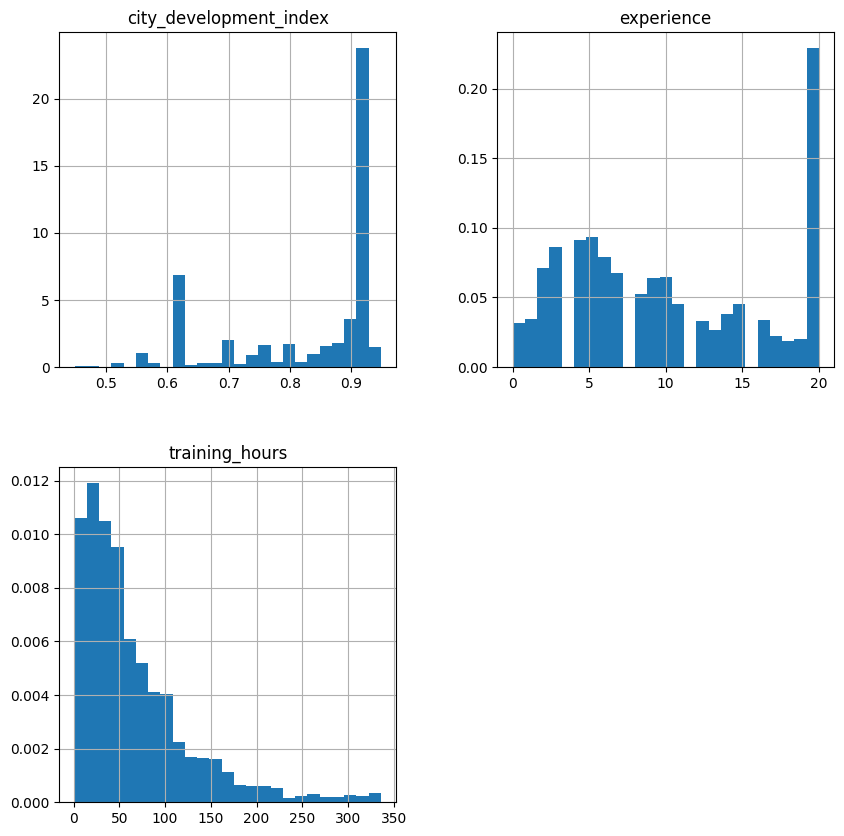

In [ ]:
new_df.hist(bins=25, density= True, figsize=(10,10))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

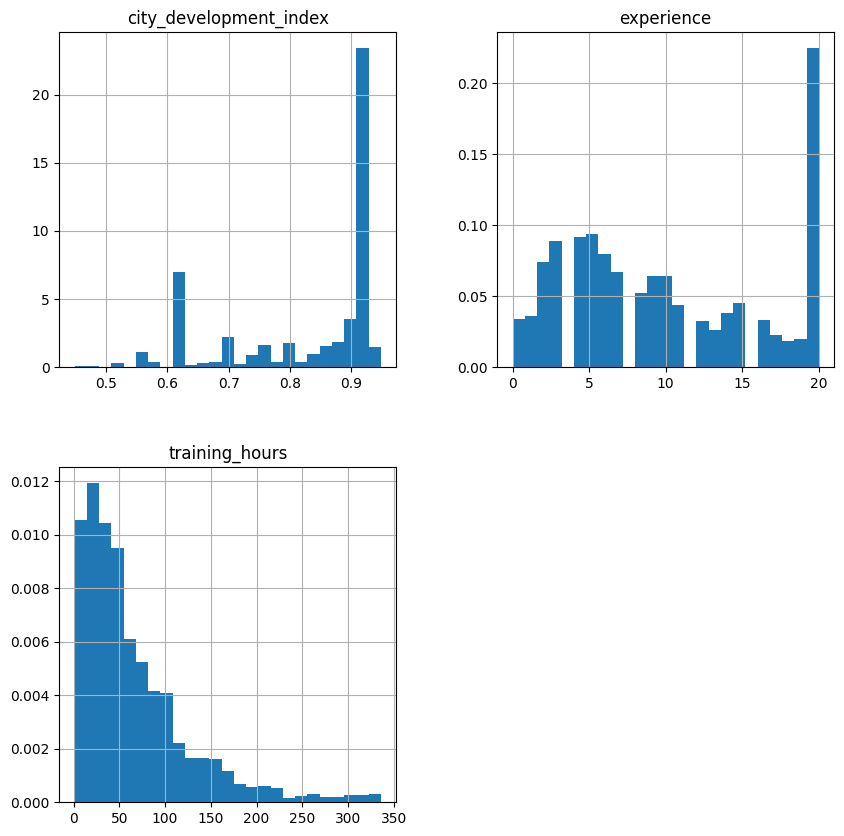

In [ ]:
df[cols].hist(bins=25, density= True, figsize=(10,10))

df is old without missing value remove and new_df is new with missing value remove but both distribution looks similar. So, we can say that in this data we can apply remove missing value.

In [ ]:
temp = pd.concat([
    #percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),
    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)], axis=1)
#add columns names
temp.columns = ['orginal', 'cca']
temp

orginal       cca
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079

In [ ]:
temp = pd.concat([
    #percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),
    #percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)], axis=1)
#add columns names
temp.columns = ['orginal', 'cca']
temp

orginal       cca
education_level                    
Graduate         0.605387  0.619835
Masters          0.227633  0.234082
High School      0.105282  0.107380
Phd              0.021610  0.022116
Primary School   0.016077  0.016587

In categotical also they look similar before and after CCA

### Impute

fill value to missing value

#### univariate
to fill in value if you take help of same col valuas only
- SimpleImputer

**Numerical**

*   mean/median
*   Arbitarry
*   random
*   end of distribution






*   mean/median: normal distribution then use mean. if it is skew then use median. pros:
easy to use and simple.

cons:
- change the shape of distribution.
- extra outliers come.
- change in covariance/ relationship

when to use:
- MCAR
- less than 5% missing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [ ]:
#using pandas fill but better is through sklearn
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)

In [ ]:
X_train.sample(5)

Age     Fare  Family  Age_mean  Age_median  Fare_mean  Fare_median
558  39.0  79.6500       2      39.0        39.0    79.6500      79.6500
361  29.0  27.7208       1      29.0        29.0    27.7208      27.7208
276  45.0   7.7500       0      45.0        45.0     7.7500       7.7500
320  22.0   7.2500       0      22.0        22.0     7.2500       7.2500
806  39.0   0.0000       0      39.0        39.0     0.0000       0.0000

In [ ]:
#variance =  a measurement of the spread between numbers in a data set
print('Orginal Age variance', X_train['Age'].var())
print('Age variance after mean', X_train['Age_mean'].var())
print('Age variance after median', X_train['Age_median'].var())

print('Orginal Fare variance', X_train['Fare'].var())
print('Fare variance after mean', X_train['Fare_mean'].var())
print('Fare variance after median', X_train['Fare_median'].var())
#variance because data has shrink because more mean and median data

Orginal Age variance 204.34951339046142
Age variance after mean 161.81262452718676
Age variance after median 161.98956633460548
Orginal Fare variance 2448.1979137063163
Fare variance after mean 2324.2385256705534
Fare variance after median 2340.09102197536


Text(0.5, 1.0, 'Age')

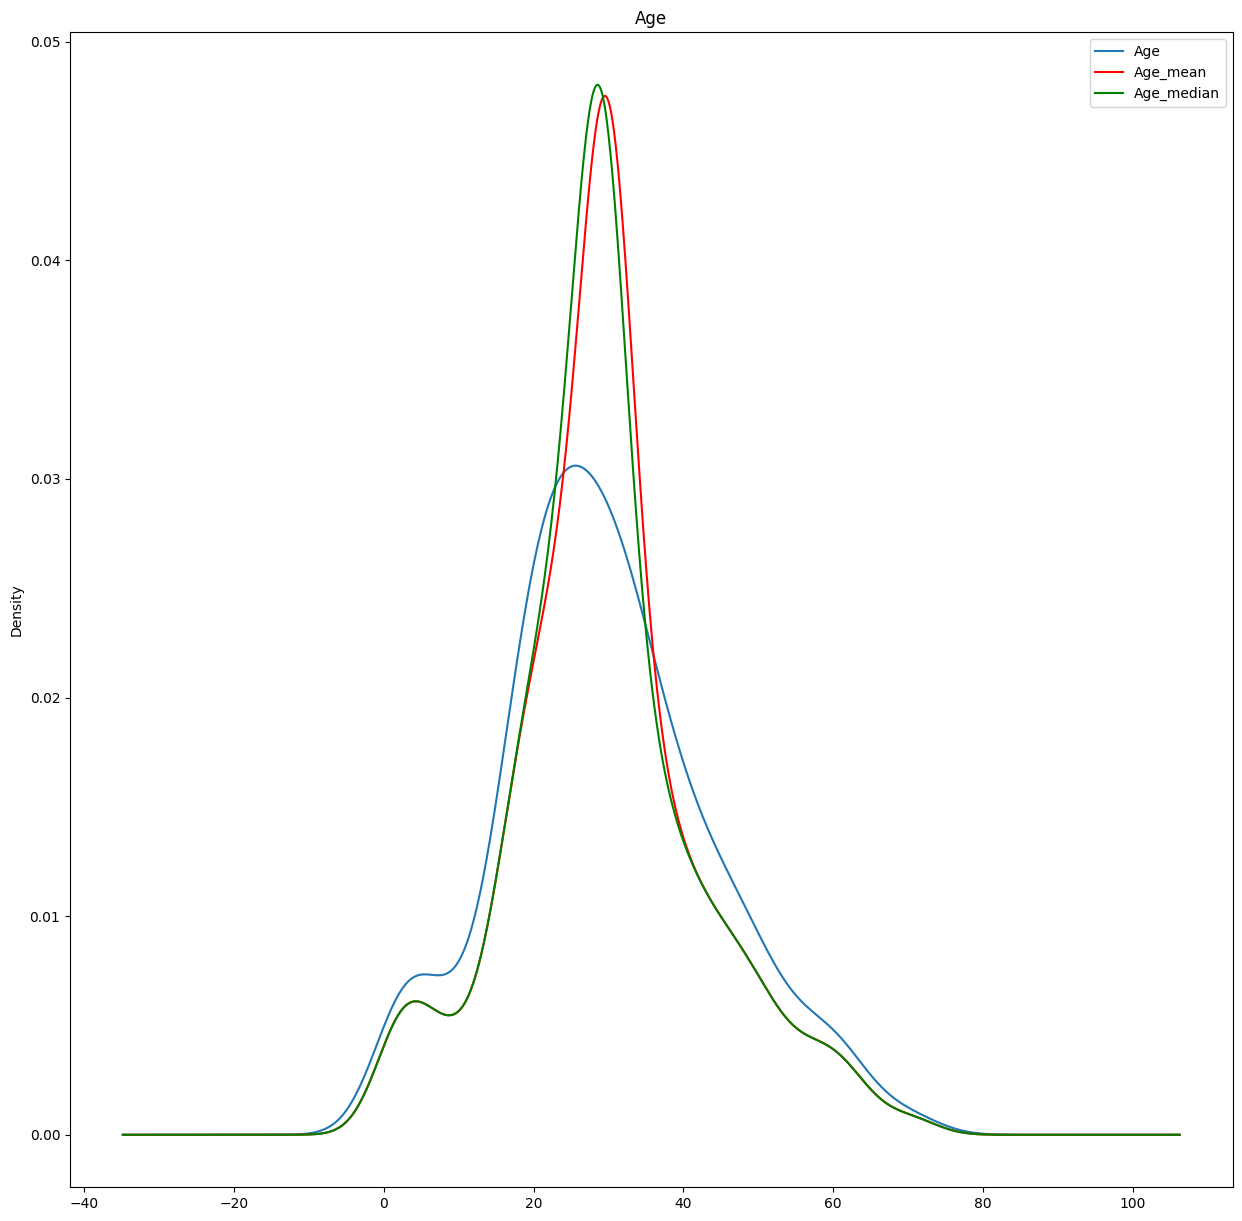

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
#orginal variable distribution
X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Age_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_title('Age')

Text(0.5, 1.0, 'Fare')

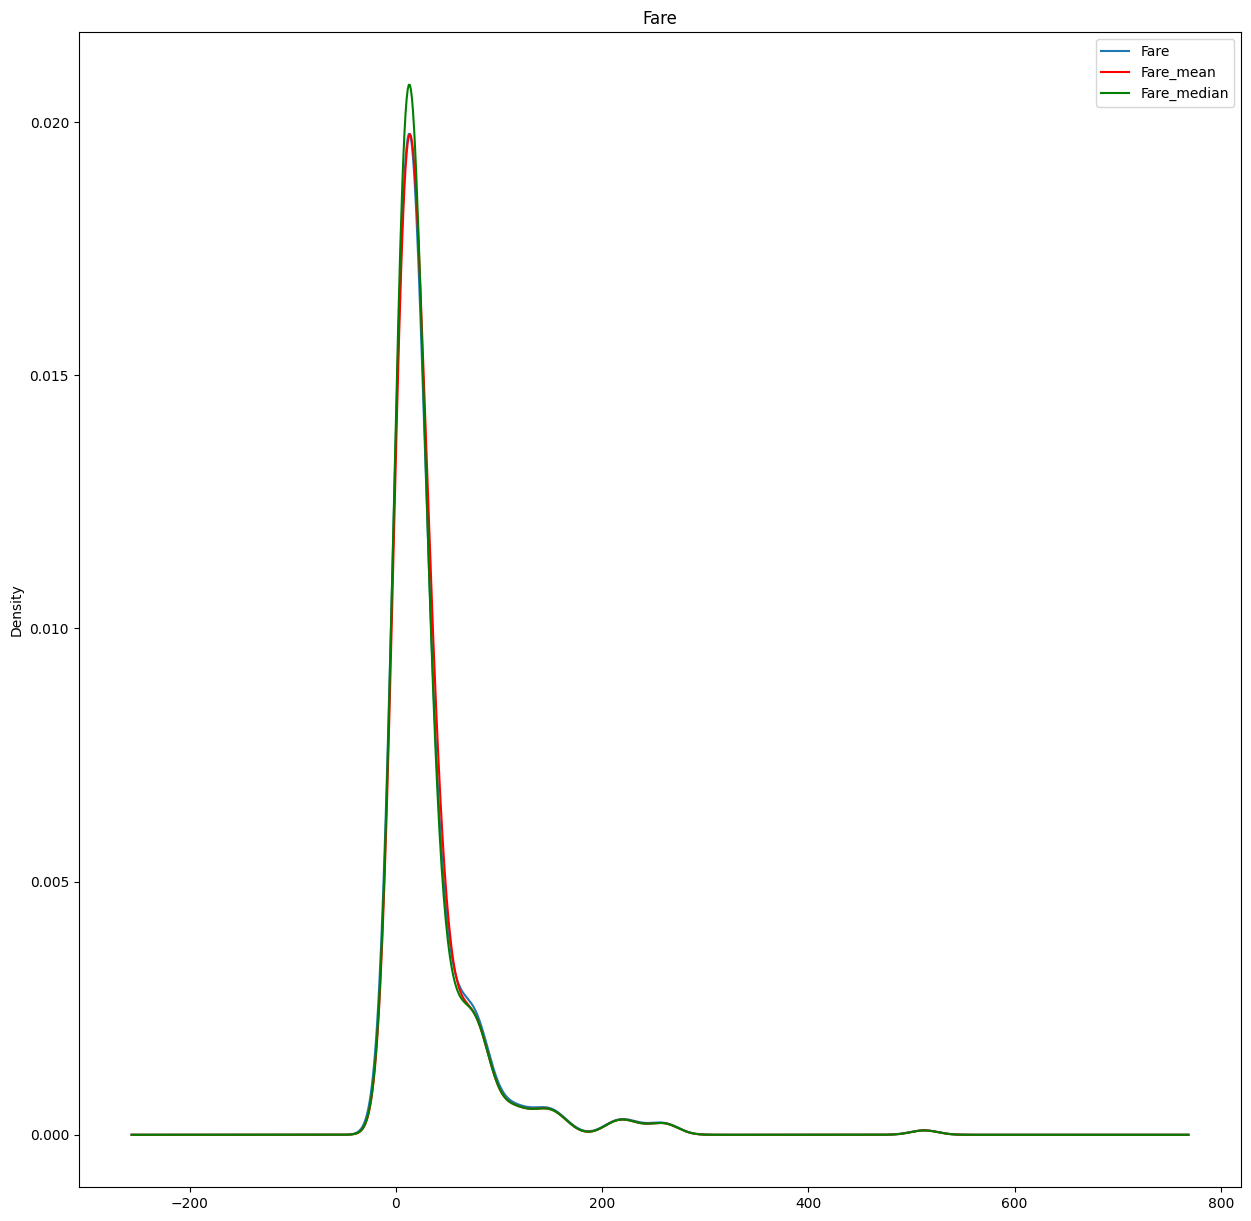

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
#orginal variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_title('Fare')

Fare is good but age is bad. before and after should look similar in distrbution of data

In [ ]:
X_train.cov() #covariance

Age         Fare     Family    Age_mean  Age_median  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   55.603719   57.957599   
Family        -6.498901    17.258917   2.735252   -5.146106   -5.112563   
Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
Age_median   204.349513    57.957599  -5.112563  161.812625  161.989566   
Fare_mean     66.665205  2448.197914  16.385048   52.788341   55.023037   
Fare_median   64.858859  2448.197914  16.476305   51.358000   53.553455   

               Fare_mean  Fare_median  
Age            66.665205    64.858859  
Fare         2448.197914  2448.197914  
Family         16.385048    16.476305  
Age_mean       52.788341    51.358000  
Age_median     55.023037    53.553455  
Fare_mean    2324.238526  2324.238526  
Fare_median  2324.238526  2340.091022

In [ ]:
X_train.corr()

Age      Fare    Family  Age_mean  Age_median  Fare_mean  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000   0.090156   
Fare         0.092644  1.000000  0.208268  0.088069    0.091757   1.000000   
Family      -0.299113  0.208268  1.000000 -0.244610   -0.242883   0.205499   
Age_mean     1.000000  0.088069 -0.244610  1.000000    0.999454   0.086078   
Age_median   1.000000  0.091757 -0.242883  0.999454    1.000000   0.089673   
Fare_mean    0.090156  1.000000  0.205499  0.086078    0.089673   1.000000   
Fare_median  0.087356  1.000000  0.205942  0.083461    0.086982   0.996607   

             Fare_median  
Age             0.087356  
Fare            1.000000  
Family          0.205942  
Age_mean        0.083461  
Age_median      0.086982  
Fare_mean       0.996607  
Fare_median     1.000000

<Axes: >

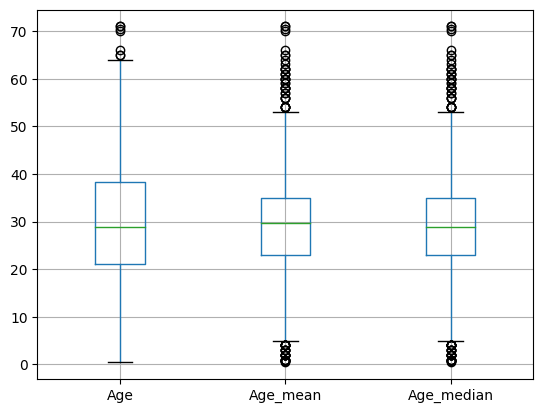

In [ ]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

As you can see that there is outlier in new data from mean and median where before was not. It is not good.

<Axes: >

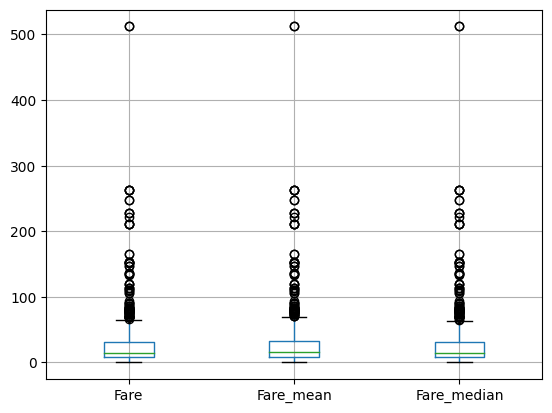

In [ ]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

But in fare this is still same. before and after outliers are same. it is good

**now with sklearn**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=2)

In [ ]:
imputer_mean=SimpleImputer(strategy='mean')
imputer_median=SimpleImputer(strategy='median')

In [ ]:
trf= ColumnTransformer([
    ('mean_age', imputer_mean, ['Age']),
    ('median_fare', imputer_median, ['Fare'])
], remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_age', SimpleImputer(), ['Age']),
                                ('median_fare',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [ ]:
trf.named_transformers_['mean_age'].statistics_ # value of mean age

array([29.78590426])

In [ ]:
trf.named_transformers_['median_fare'].statistics_ # value of median age

array([14.4583])

In [ ]:
X_train_trf=trf.transform(X_train) #transforming
X_test_trf=trf.transform(X_test)

** Arbitrary Value Imputation**
we place a value in the place of missing value. which will denote the model that this has missing value

In case of cate we use Missing is place of NaN and in numerical we use -1, 0 or 99.999. Just want create a difference that here is no data.

when to use?
when data is not missing at random. It is missing in chunks

pros:
- easy

cons:
- pdf distort
- variance and covariance change


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/content/titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [ ]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99) # arbitary value 99 and -1
X_train['Age_minus1'] = X_train['Age'].fillna(-1)
X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [ ]:
print('Orginal Age variance', X_train['Age'].var())
print('Age variance after 99', X_train['Age_99'].var())
print('Age variance after -1', X_train['Age_minus1'].var())

print('Orginal Fare variance', X_train['Fare'].var())
print('Fare variance after 999', X_train['Fare_999'].var())
print('Fare variance after -1', X_train['Fare_minus1'].var())

Orginal Age variance 204.34951339046142
Age variance after 99 951.7275570187188
Age variance after -1 318.0896202624488
Orginal Fare variance 2448.1979137063163
Fare variance after 999 47219.202652176304
Fare variance after -1 2378.5676784883494


**End of distribution Imputation**
same as arbitary but in this case we use the value of end of the distribution rather than choosing random value to fill in.

To find end distribution:
normally = mean+3*sigma  or  mean-3*sigma

skew =Q1-1.5*IQR or Q1+1.5*IQR

it is used to show(indicate ) here is missing value. It is missingness indication

same as arbitary


**Categorical**


*   mode(most freq)
*   missing



**Most frequent value imputation**
we replace with mode. replace by most frequent value

cons:
- change data distribution



**Misssing**
when there is missing more than 10 % of data we donot use mode rather we create new categories and called it missing cate

same as arbitrary in numerical




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/train_house.csv', usecols =['GarageQual', 'FireplaceQu',  'SalePrice'])
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [ ]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Count house')

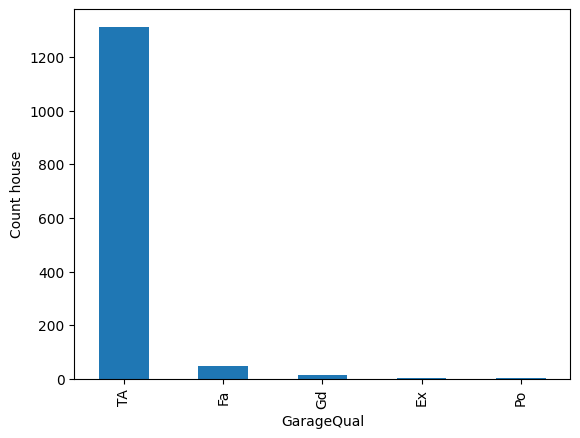

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count house')

In [ ]:
# using mode
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0, 0.5, 'Count house')

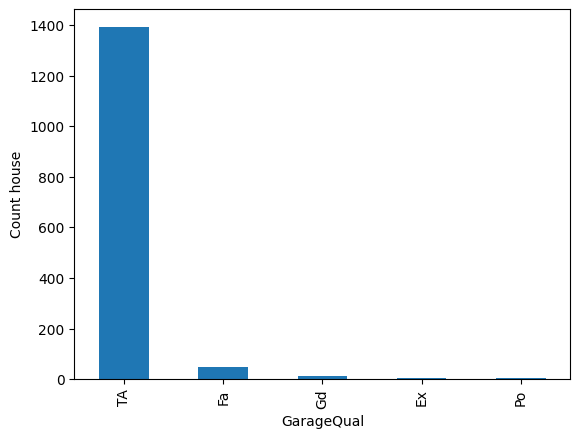

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count house')

Text(0.5, 1.0, 'GarageQual')

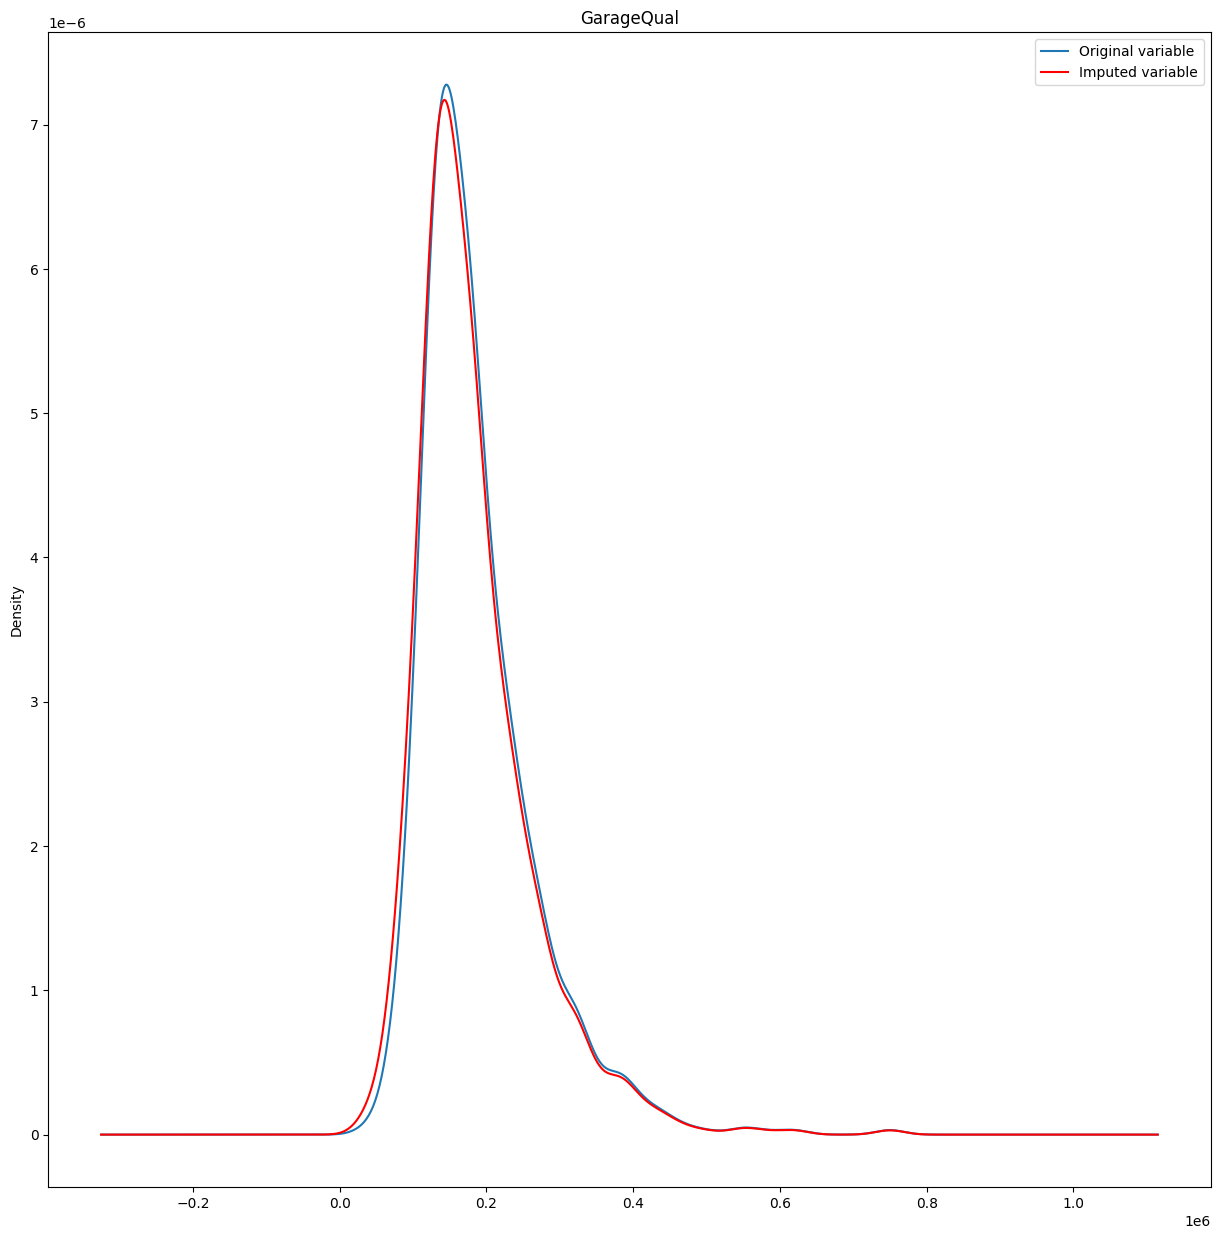

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
#orginal variable distribution
temp.plot(kind='kde', ax=ax)
# disribution after impute
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels=['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

It look smiliar because less data was missing.

Now look how it effect when more data are missing.

Text(0, 0.5, 'Count house')

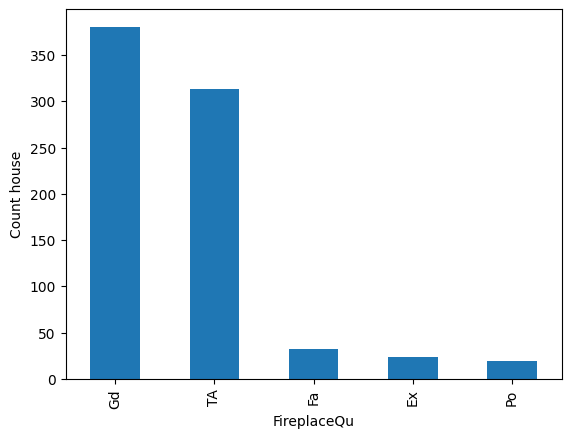

In [ ]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Count house')

In [ ]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 0, 'FireplaceQu')

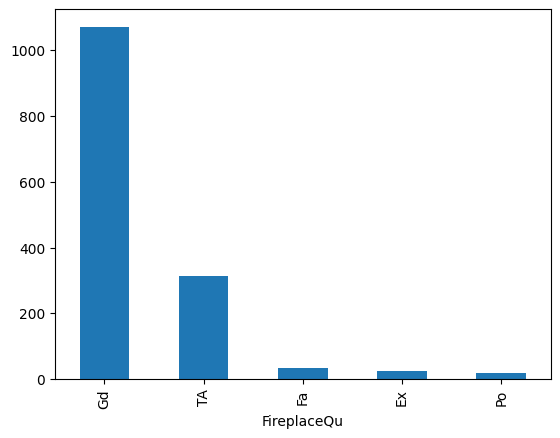

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')

Text(0.5, 1.0, 'Fireplace')

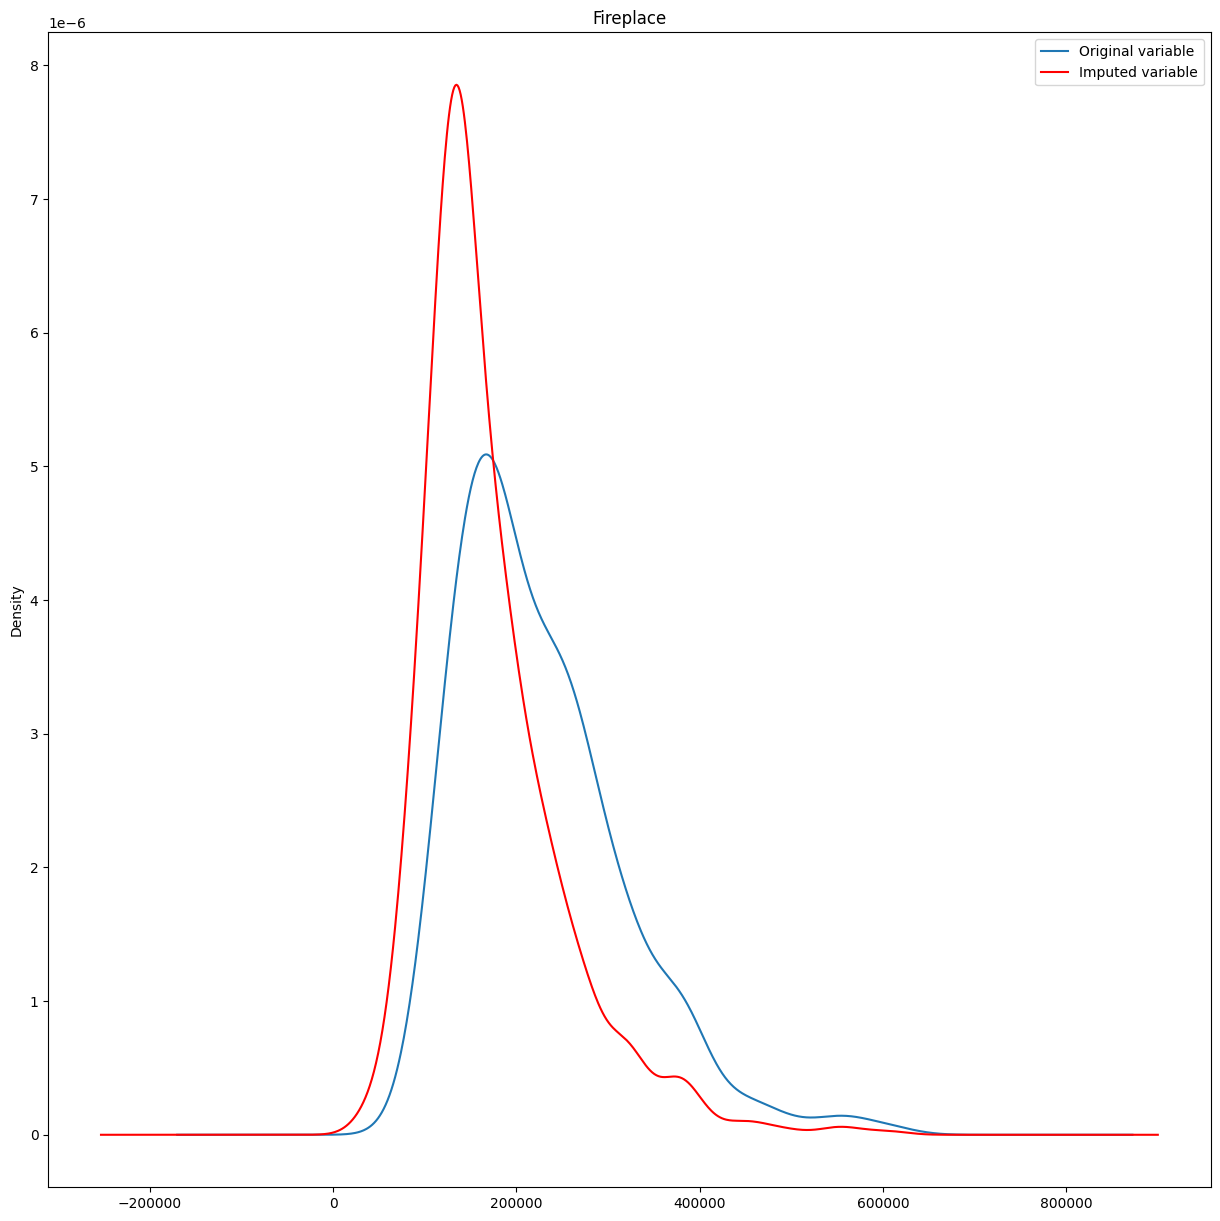

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
#orginal variable distribution
temp.plot(kind='kde', ax=ax)
# disribution after impute
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels=['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('Fireplace')

As you can see it completely different. because many value was missing

In [ ]:
#using sk
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
imputer

SimpleImputer(strategy='most_frequent')

**now using missing **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_missing=pd.read_csv('/content/train_house.csv', usecols =['GarageQual', 'FireplaceQu',  'SalePrice'])
df_missing.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

Text(0, 0.5, 'Count house')

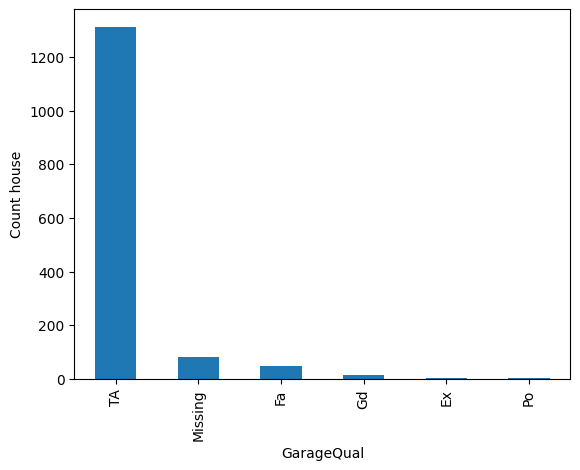

In [ ]:
df_missing['GarageQual'].fillna('Missing', inplace=True)
df_missing['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count house')

In [ ]:
#  using sk
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_missing.drop('SalePrice', axis=1), df_missing['SalePrice'], test_size=0.2, random_state=2)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

**Random**
fill in missing value randomly from the number or category from value that is already present same col.

Pros:
- easy
- distribution doesnot change
- linear based

cons
- doesnot work best with decision tree
- covariance may change
- memory heavy  for deployment




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df_random=pd.read_csv('/content/train.csv', usecols =['Age','Fare','Survived'])
df_random.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
df_random.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_random.drop('Survived', axis=1), df_random['Survived'], test_size=0.2, random_state=2)
# we are just copy value of age to age_imputed col
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [ ]:
#calling all row of age_imputed where value is null
#_train['Age_imputed'][X_train['Age_imputed'].isnull()]

# suming the number of value in age col which is missing
#X_train['Age'].isnull().sum()

#no any missing vlaue because drop
#X_train['Age'].dropna()

# it provide one value which has actual value of that col
# not by any chance it will provide NaN because it is already dropped
#X_train['Age'].dropna().sample(1).values

#finally
#filling with random varible
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [ ]:
X_train

Age      Fare  Age_imputed
30   40.0   27.7208         40.0
10    4.0   16.7000          4.0
873  47.0    9.0000         47.0
182   9.0   31.3875          9.0
876  20.0    9.8458         20.0
..    ...       ...          ...
534  30.0    8.6625         30.0
584   NaN    8.7125         42.0
493  71.0   49.5042         71.0
527   NaN  221.7792         18.0
168   NaN   25.9250         32.0

[712 rows x 3 columns]

<Axes: xlabel='Age', ylabel='Density'>

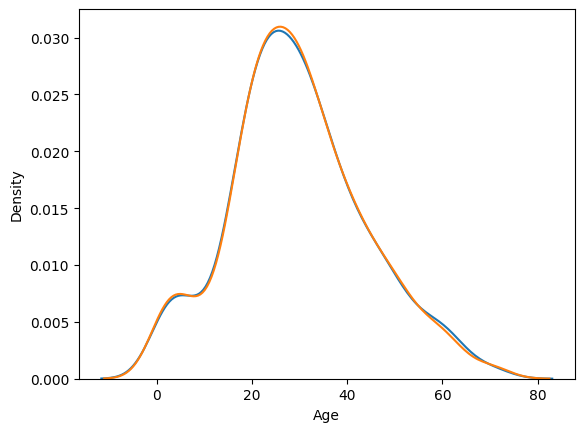

In [ ]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['Age_imputed'])

In [ ]:
print('Orginal Age variance', X_train['Age'].var())
print('Age variance after impute', X_train['Age_imputed'].var())

Orginal Age variance 204.34951339046142
Age variance after impute 203.01521006337015


<Axes: >

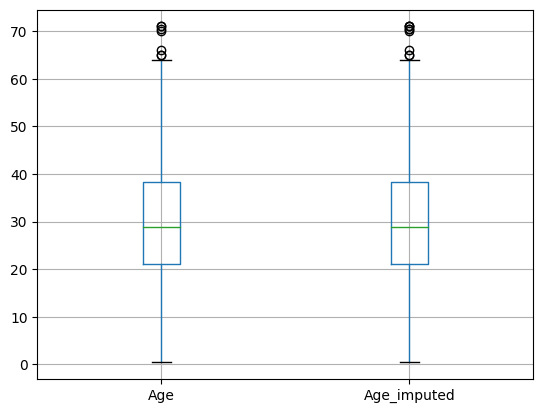

In [ ]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
# production
# if user is try to predict it automaticly select age if left blank on age
# so it can produce different perdiction each time
# because it may select age 60 somtime, age 3 sometime
# so now it will have fare as observation. now when if fare value doesnot change age will also remain same
sample_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

For cate

In [ ]:
data =pd.read_csv('/content/train_house.csv', usecols =['GarageQual', 'FireplaceQu',  'SalePrice'])
data.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [ ]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [ ]:
X= data
y=data['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']
X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-56-e1ca3b8e31eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-56-e1ca3b8e31eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-56-e1ca3b8e31eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

<ipython-input-57-b49db5418e3f>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( X_train[X_train['GarageQual']==category]['SalePrice'], label= category)
<ipython-input-57-b49db5418e3f>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( X_train[X_train['GarageQual']==category]['SalePrice'], label= category)


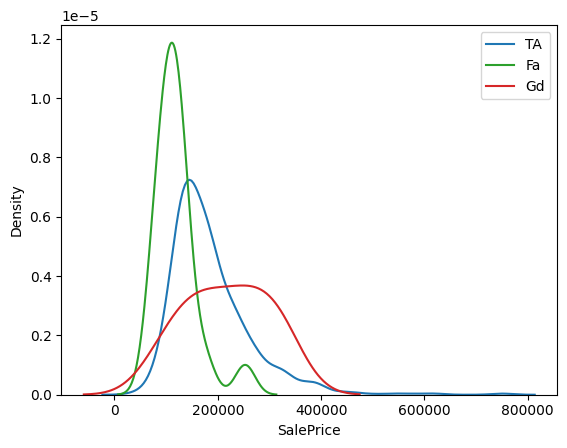

In [ ]:
for category in X_train['GarageQual'].unique():
  sns.kdeplot( X_train[X_train['GarageQual']==category]['SalePrice'], label= category)
plt.legend()
plt.show()

<ipython-input-58-057c417e6dfd>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( X_train[X_train['GarageQual_imputed']==category]['SalePrice'], label= category)
<ipython-input-58-057c417e6dfd>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( X_train[X_train['GarageQual_imputed']==category]['SalePrice'], label= category)


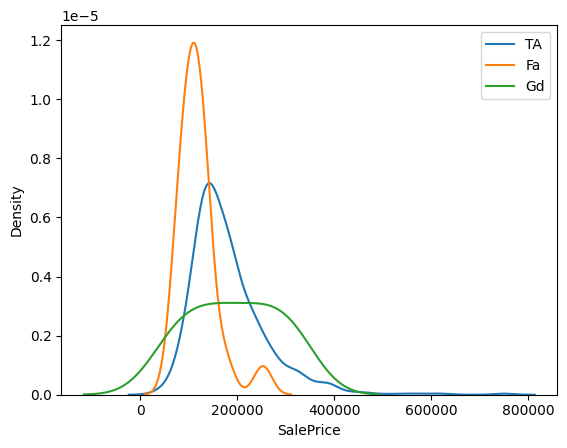

In [ ]:
for category in X_train['GarageQual_imputed'].unique():
  sns.kdeplot( X_train[X_train['GarageQual_imputed']==category]['SalePrice'], label= category)
plt.legend()
plt.show()

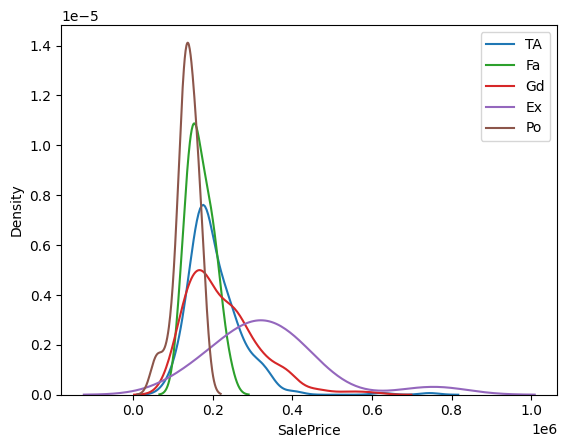

In [ ]:
for category in X_train['FireplaceQu'].unique():
  sns.kdeplot( X_train[X_train['FireplaceQu']==category]['SalePrice'], label= category)
plt.legend()
plt.show()

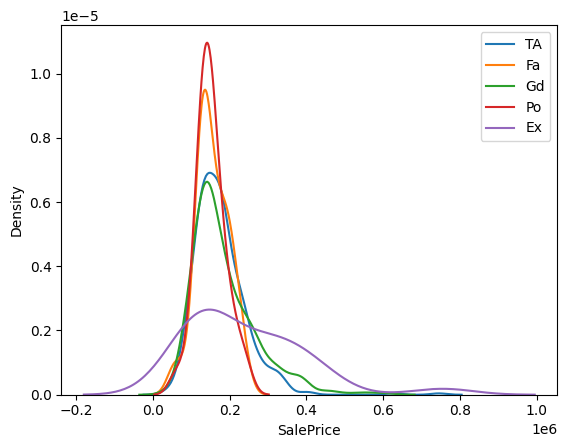

In [ ]:
for category in X_train['FireplaceQu_imputed'].unique():
  sns.kdeplot( X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'], label= category)
plt.legend()
plt.show()

there is difference in fireplace and fireplace_imputed but in garagequ and garager_imputed is same. it is okay to put in less value missing

**Missing indicator**
if missing value then true other wise false

- model will learn to difference between missing value and having value

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, MissingIndicator
df_missing_ind=pd.read_csv('/content/train.csv', usecols =['Age','Fare','Survived'])
df_missing_ind.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
X= df_missing_ind.drop('Survived', axis=1)
y=df_missing_ind['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#no _missing value
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf, y_train)
y_pred=clf.predict(X_test_trf)

# score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6145251396648045

In [ ]:
mi=MissingIndicator()
mi.fit(X_train)


MissingIndicator()

In [ ]:
mi.features_

array([0])

In [ ]:
X_train_missing=mi.transform(X_train)
X_test_missing=mi.transform(X_test)

In [ ]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
X_train['Age_NA']=X_train_missing
X_test['Age_NA']=X_test_missing

In [ ]:
#now it has age_na
X_train.sample(10)

Age     Fare  Age_NA
783   NaN  23.4500    True
174  56.0  30.6958   False
824   2.0  39.6875   False
56   21.0  10.5000   False
245  44.0  90.0000   False
784  25.0   7.0500   False
49   18.0  17.8000   False
271  25.0   0.0000   False
133  29.0  26.0000   False
53   29.0  26.0000   False

In [ ]:
si=SimpleImputer()
X_train_trf2=si.fit_transform(X_train)
X_test_trf2=si.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf2, y_train)
y_pred=clf.predict(X_test_trf2)
# score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6312849162011173

Before was 0.61 without indicator and after was 0.63 with indicator that means it improve model

In [ ]:
# from sklearn
# you can also now use as parameter in SimpleImputer
si=SimpleImputer(add_indicator=True)
X_train=si.fit_transform(X_train)
X_test=si.transform(X_test)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf2, y_train)
y_pred=clf.predict(X_test_trf2)
# score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6312849162011173

**Automatic Select**
how can we select a parameter value automatically for imputation technique?

Ans:- gridsearchCV



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('/content/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [ ]:
X= df.drop('Survived', axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
30        1    male  40.0      0      0  27.7208        C
10        3  female   4.0      1      1  16.7000        S
873       3    male  47.0      0      0   9.0000        S
182       3    male   9.0      4      2  31.3875        S
876       3    male  20.0      0      0   9.8458        S

In [ ]:
#num age, fare
#cat sex, embarked, parch, sibsp
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
clf=Pipeline(steps=[('preprocessor', preprocessor),
                   ('classifier', LogisticRegression())])

In [ ]:
y_train.head()

30     0
10     1
873    0
182    0
876    0
Name: Survived, dtype: int64

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

print(f"Internal CV score: {grid_search.best_score_:.3f}")

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
Internal CV score: 0.788


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

param_classifier__C param_preprocessor__cat__imputer__strategy  \
4                  1.0                              most_frequent   
5                  1.0                              most_frequent   
6                  1.0                                   constant   
7                  1.0                                   constant   
8                   10                              most_frequent   
9                   10                              most_frequent   
10                  10                                   constant   
11                  10                                   constant   
12                 100                              most_frequent   
13                 100                              most_frequent   
14                 100                                   constant   
15                 100                                   constant   
0                  0.1                              most_frequent   
1                  0.1                              most_frequent   
2                  0.1                                   constant   
3                  0.1                                   constant   

   param_preprocessor__num__imputer__strategy  mean_test_score  
4                                        mean         0.787852  
5                                      median         0.787852  
6                                        mean         0.787852  
7                                      median         0.787852  
8                                        mean         0.787852  
9                                      median         0.787852  
10                                       mean         0.787852  
11                                     median         0.787852  
12                                       mean         0.787852  
13                                     median         0.787852  
14                                       mean         0.787852  
15                                     median         0.787852  
0                                        mean         0.786444  
1                                      median         0.786444  
2                                        mean         0.786444  
3                                      median         0.786444

#### multivariate
to fill in value if you take help of other cols values

**KNN imputer**
You are like your neighbour and you act like your neighbours.

If any value is missing then we will search the row which is similar col value to missing value row and fill the value of similar row of that col to missing value

we find similarity by eucliden distance

KNN= k nearest neighbour

K = number of neighbour

if 2 is k  then we will find 2 nearest neighbour and sum the nearest neighbour col value then divide by 2 then the value be the missing value

1. find k nearest nei by eucliden distance

2. weight = uniform, find the value by adding k nei and divide by k
```
 value= value nei +value nei + k value nei/ k
```
but
when # weight = distance
```
value = ((1/dist nei)* value nei +(1/dist nei)* value nei) + k same/ k
```

neighbour = less distance

for missing value:
nan_euclidean_distances
```
dist(x,y) = sqrt(weight * sq. distance from present coordinates) where, weight = Total # of coordinates / # of present coordinates
```
we only take value which both have

Pros: more accurate
cons: less speed , more memory

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df_knn=pd.read_csv('/content/train.csv', usecols =['Age','Pclass','Fare','Survived'])
df_knn.head()

Survived  Pclass   Age     Fare
0         0       3  22.0   7.2500
1         1       1  38.0  71.2833
2         1       3  26.0   7.9250
3         1       1  35.0  53.1000
4         0       3  35.0   8.0500

In [ ]:
df_knn.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
X= df_knn.drop('Survived', axis=1)
y=df_knn['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

Pclass   Age     Fare
30        1  40.0  27.7208
10        3   4.0  16.7000
873       3  47.0   9.0000
182       3   9.0  31.3875
876       3  20.0   9.8458

In [ ]:
#metric= nan_eucliden, missing_values=np.nan, add_indicator= False by default
# weight = uniform, n_neighbours= 5
#
knn=KNNImputer()
X_train_trf=knn.fit_transform(X_train)
X_test_trf=knn.transform(X_test)

In [ ]:
pd.DataFrame(X_train_trf, columns=X_train.columns)

Pclass   Age      Fare
0       1.0  40.0   27.7208
1       3.0   4.0   16.7000
2       3.0  47.0    9.0000
3       3.0   9.0   31.3875
4       3.0  20.0    9.8458
..      ...   ...       ...
707     3.0  30.0    8.6625
708     3.0  24.4    8.7125
709     1.0  71.0   49.5042
710     1.0  33.6  221.7792
711     1.0  42.8   25.9250

[712 rows x 3 columns]

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_trf, y_train)
y_pred=lr.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.7039106145251397

**Iterative imputer**
MICE(multivariate Imputation by chanied equation) Algo

MAR(missing at random)= can be fill by
 the help other col of same row

pros: accurate

cons: slow



In [ ]:
#### multivariate
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
df = np.round(pd.read_csv('50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

R&D Spend  Administration  Marketing Spend  Profit
21        8.0            15.0             30.0    11.0
37        4.0             5.0             20.0     9.0
2        15.0            10.0             41.0    19.0
14       12.0            16.0             26.0    13.0
44        2.0            15.0              3.0     7.0

In [ ]:
df= df.iloc[:,0:-1]
df

R&D Spend  Administration  Marketing Spend
21        8.0            15.0             30.0
37        4.0             5.0             20.0
2        15.0            10.0             41.0
14       12.0            16.0             26.0
44        2.0            15.0              3.0

In [ ]:
#removing value of dataset
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

<ipython-input-30-d430125716a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.NaN
<ipython-input-30-d430125716a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.NaN
<ipython-input-30-d430125716a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,-1] = np.NaN


In [ ]:
# fill all nana value with mean of respective cols
df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())
df0

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37       9.25            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.25            26.00
44       2.00           15.00            29.25

In [ ]:
# we will make value predicting from top of left side in which first nan value
# by using other rows we make model where y be the col which  is missing col and x be other cols
# but we donot put missing value row
# then we using model as prediction
#find the missing value by the model

# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21        8.0           15.00            30.00
37        NaN            5.00            20.00
2        15.0           10.00            41.00
14       12.0           11.25            26.00
44        2.0           15.00            29.25

In [ ]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

Administration  Marketing Spend
21           15.00            30.00
2            10.00            41.00
14           11.25            26.00
44           15.00            29.25

In [ ]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [ ]:
# model for predication of NaN value
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [ ]:
#saveing the value come from prediction
df1.iloc[1,0] = 23.14

In [ ]:
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.25            26.00
44       2.00           15.00            29.25

In [ ]:
#lets find another
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21       8.00            15.0            30.00
37      23.14             5.0            20.00
2       15.00            10.0            41.00
14      12.00             NaN            26.00
44       2.00            15.0            29.25

In [ ]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

R&D Spend  Marketing Spend
21       8.00            30.00
37      23.14            20.00
2       15.00            41.00
44       2.00            29.25

In [ ]:

y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [ ]:

df1.iloc[3,1] = 11.06

In [ ]:
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.06            26.00
44       2.00           15.00            29.25

In [ ]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00             30.0
37      23.14            5.00             20.0
2       15.00           10.00             41.0
14      12.00           11.06             26.0
44       2.00           15.00              NaN

In [ ]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

R&D Spend  Administration
21       8.00           15.00
37      23.14            5.00
2       15.00           10.00
14      12.00           11.06

In [ ]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [ ]:

df1.iloc[4,-1] = 31.56

In [ ]:
# After 1st Iteration
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.06            26.00
44       2.00           15.00            31.56

In [ ]:
# Subtract 0th iteration from 1st iteration

df1 - df0

R&D Spend  Administration  Marketing Spend
21       0.00            0.00             0.00
37      13.89            0.00             0.00
2        0.00            0.00             0.00
14       0.00           -0.19             0.00
44       0.00            0.00             2.31

In [ ]:
# again repeat untill difference of current and previous become zero
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

R&D Spend  Administration  Marketing Spend
21        8.0           15.00            30.00
37        NaN            5.00            20.00
2        15.0           10.00            41.00
14       12.0           11.06            26.00
44        2.0           15.00            31.56

We keep on doing it untill all value becomes zero difference. This is iterative process unitll it find difference 0 in all dataset from previous iteration.

## Handling Categorical Values
sklearn only understand numerical data so, if the data is in str categorical then we need to convert into numerical

we use one-hot code method

Encoding categorical data

Categorical are of two types
1. nominal
2. ordinal

#### Nominal data:
categories donot have relationship or order with each other. for eg: state,

for nominal data use one-hot encoding


One-hot encoding: Nominal categories col is seperated and make new col in name of that group category.

If a data comes under that group category they will have 1 in that col otherwise 0.

if you have 100 category in a col then it will make 100 new col for each category


Multi collinearity happen when using dummies variable.


multi collinearity = you cannot have mathmatical relationship or inter dependency between in input cols

For that we always remove 1  first col.
n give n-1 col. for eg: if there is 4 category in col then it makes 3 new col

Imagine there are 3 cate:
    
I B   R

Y 0   0

B 1   0

R 0   1

from this we make 2 col for 3 cate. If B 0 and R 0 that means Y 1 . this how it works. This slove multicollinearity problem.

OHE using frequent variable: we make single col for each cate which occurs most frequently and for  other least occuring cate we make other cate col.
this method can reduce dim.


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/cars.csv')
df.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [ ]:
df.brand.value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [ ]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [ ]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [ ]:
# OHE using pandas
# since brand has many cate which will create many cate col
# right now, we only do OHE in fuel and owner
pd.get_dummies(df, columns=['fuel', 'owner'])

brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_LPG  \
0      Maruti     145500         450000     False         True     False   
1       Skoda     120000         370000     False         True     False   
2       Honda     140000         158000     False        False     False   
3     Hyundai     127000         225000     False         True     False   
4      Maruti     120000         130000     False        False     False   
...       ...        ...            ...       ...          ...       ...   
8123  Hyundai     110000         320000     False        False     False   
8124  Hyundai     119000         135000     False         True     False   
8125   Maruti     120000         382000     False         True     False   
8126     Tata      25000         290000     False         True     False   
8127     Tata      25000         290000     False         True     False   

      fuel_Petrol  owner_First Owner  owner_Fourth & Above Owner  \
0           False               True                       False   
1           False              False                       False   
2            True              False                       False   
3           False               True                       False   
4            True               True                       False   
...           ...                ...                         ...   
8123         True               True                       False   
8124        False              False                        True   
8125        False               True                       False   
8126        False               True                       False   
8127        False               True                       False   

      owner_Second Owner  owner_Test Drive Car  owner_Third Owner  
0                  False                 False              False  
1                   True                 False              False  
2                  False                 False               True  
3                  False                 False              False  
4                  False                 False              False  
...                  ...                   ...                ...  
8123               False                 False              False  
8124               False                 False              False  
8125               False                 False              False  
8126               False                 False              False  
8127               False                 False              False  

[8128 rows x 12 columns]

In [ ]:
# to slove multi collinearity
#K-1 OHE
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True)
# now its 10 col, fuel_CNG and owner_First Owner cols are remove

brand  km_driven  selling_price  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0      Maruti     145500         450000         True     False        False   
1       Skoda     120000         370000         True     False        False   
2       Honda     140000         158000        False     False         True   
3     Hyundai     127000         225000         True     False        False   
4      Maruti     120000         130000        False     False         True   
...       ...        ...            ...          ...       ...          ...   
8123  Hyundai     110000         320000        False     False         True   
8124  Hyundai     119000         135000         True     False        False   
8125   Maruti     120000         382000         True     False        False   
8126     Tata      25000         290000         True     False        False   
8127     Tata      25000         290000         True     False        False   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                          False               False                 False   
1                          False                True                 False   
2                          False               False                 False   
3                          False               False                 False   
4                          False               False                 False   
...                          ...                 ...                   ...   
8123                       False               False                 False   
8124                        True               False                 False   
8125                       False               False                 False   
8126                       False               False                 False   
8127                       False               False                 False   

      owner_Third Owner  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False  
...                 ...  
8123              False  
8124              False  
8125              False  
8126              False  
8127              False  

[8128 rows x 10 columns]

when doing ML we donot use this because pandas doesnot remember where did he put the col. So each time we run col is place at different place

So, we use sklearn OHE for ML because it remember everything


In [ ]:
# OHE using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size=0.2, random_state=2)
X_train.head()


brand  km_driven    fuel         owner
5571   Hyundai      35000  Diesel   First Owner
2038      Jeep      60000  Diesel   First Owner
2957   Hyundai      25000  Petrol   First Owner
7618  Mahindra     130000  Diesel  Second Owner
6684   Hyundai     155000  Diesel   First Owner

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# multi colinerarity
#ohe=OneHotEncoder()

# this will remove multi colinearity by removing first col of each
#ohe=OneHotEncoder(drop='first')

# if we do sparse = false the it will automatically in array
# no need to convert into array from sparse matrix
ohe=OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

# it was in parser  matrix so we need to convert to array
#X_train_new= ohe.fit_transform(X_train[['fuel', 'owner']]).toarray()

#spare false
X_train_new= ohe.fit_transform(X_train[['fuel', 'owner']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# spare to array
#X_test_new=ohe.transform(X_test[['fuel', 'owner']]).toarray()

#spare false
X_test_new=ohe.transform(X_test[['fuel', 'owner']])

In [ ]:
# now we need to combine col brand, km_driven and the X_test_new
# converting pd df to array
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new)).shape

(6502, 9)

In [ ]:
#OHE with top cate(frequent)
counts=df['brand'].value_counts()
counts

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [ ]:
df['brand'].nunique()

32

In [ ]:
threshold=100
#storing the brands which is equal to 100 or more cars
repl = counts[counts <= threshold].index

In [ ]:
# for other we use uncommon
pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

BMW  Chevrolet   Ford  Honda  Hyundai  Mahindra  Maruti  Renault  \
0     False      False  False  False    False     False    True    False   
1     False      False  False  False    False     False   False    False   
2     False      False  False   True    False     False   False    False   
3     False      False  False  False     True     False   False    False   
4     False      False  False  False    False     False    True    False   
...     ...        ...    ...    ...      ...       ...     ...      ...   
8123  False      False  False  False     True     False   False    False   
8124  False      False  False  False     True     False   False    False   
8125  False      False  False  False    False     False    True    False   
8126  False      False  False  False    False     False   False    False   
8127  False      False  False  False    False     False   False    False   

      Skoda   Tata  Toyota  Volkswagen  uncommon  
0     False  False   False       False     False  
1      True  False   False       False     False  
2     False  False   False       False     False  
3     False  False   False       False     False  
4     False  False   False       False     False  
...     ...    ...     ...         ...       ...  
8123  False  False   False       False     False  
8124  False  False   False       False     False  
8125  False  False   False       False     False  
8126  False   True   False       False     False  
8127  False   True   False       False     False  

[8128 rows x 13 columns]

#### Ordinal data
there is relationship or order between data. For eg: division

for ordinal data use ordinal encoding

Ordinal encodeing is use for ordinal input data

##### Ordinal encoding
If col is cate and also is in input col than we use ordinal encoding

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/customer.csv')
df.sample(5)

age  gender   review education purchased
42   30  Female     Good        PG       Yes
34   86    Male  Average    School        No
2    70  Female     Good        PG        No
24   16  Female  Average        PG       Yes
17   22  Female     Poor        UG       Yes

In [ ]:
# we see gender(nominal), review(ordinal), education(ordinal), purchased(nominal) are categorical col
# in gender one hot encoding, review and education odinal encoding, and purchased label encoding

df=df.iloc[:,2:]
df.head()


review education purchased
0  Average    School        No
1     Poor        UG        No
2     Good        PG        No
3     Good        PG        No
4  Average        UG        No

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# placing each col cate in list in ascending oder
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
oe.fit(X_train)
X_train=oe.transform(X_train)
#model is ready by X_train data. so, just need to transfrom for X_test
X_test=oe.transform(X_test)

In [ ]:
X_train.shape

(40, 2)

In [ ]:
# it is array
X_train

array([[0., 2.],
       [2., 2.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [0., 0.],
       [0., 2.],
       [0., 0.],
       [2., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [2., 0.],
       [2., 2.],
       [0., 2.],
       [2., 1.],
       [0., 1.],
       [2., 0.],
       [1., 2.],
       [2., 1.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.]])

In [ ]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

##### Label encoding
If the data col is ordinal categorical data and also target col or ouput col then we need to use label encoding for that target **data**
This is use for output label

In [ ]:
y_train.head()

27     No
33    Yes
5     Yes
12     No
16    Yes
Name: purchased, dtype: object

In [ ]:
# since purchased col is target col or output col and this is ordinal data
# so, we need to use label encoding
from sklearn.preprocessing import LabelEncoder
# here we donot have option to decide the order like ordinal encoding
# it is automatically decide by encoder
le=LabelEncoder()

le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

## Outlier Detection
outlier create inaccurate model so, we need to remove it before we train our model.

data which act different from usual dataset

when it is dangerous?
>universal cannot be proven

when is helpful:
- Outlier help to detect anomalies

Effect of outliers on ML algo:
- linear regression
- DL
- ada boodt
- logistic regression

if you are doing  weight based algo then it will effect algoritm

It doesnot effect much in tree based algorithm

How to treat outliers?
1. trimming: pros- fast, cons- if data is less then it will make more less data
2. capping: make limit
3. treat as missing value: use missing value techinque
4. discreatization

How to detect outliers?
1. Normal distribution:
if (mean+ 3 sigma)> or (mean - 3 sigma)< value then it is  outliers
2. skewed distribition:
make boxplot smaller than min= Q1 - 1.5 IQR and greater then max= Q3+ 1.5 IQR then it is outlier
3. other distribution: percential based approch: if it is less than 2.5 percentile and more than 97.5 percentile then it is outliers

### Z-score
it should must be or almostly normally distributed.
most of the value are in center.

(mean + std deriv) + (mean - std deriv) 68% of data

(mean + 2std deriv) + (mean - 2std deriv)= 95.4%

(mean + 3std deriv) + (mean - 3std deriv)= 99.7%

if it is out of this (mean + 3std deriv) and (mean - 3std deriv) boundary then it is outlier

Z score= Xi' = Xi- mean/ std dev  

Z score need to -3 to 3


**outlier treatment**

trimming: deleting or removing the outlier

capping: if the limit of outlier is 95 in upper bound and 5 in lower bound but you have outlier data 2 98 100 4 then we make 2 to 5 and also we change 4 to 5 and 98 to 95 and 100 50 95. This is capping. replace max and min value when outlier comes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/placement.csv')
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

<ipython-input-3-5ef2c2b706e0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-3-5ef2c2b706e0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


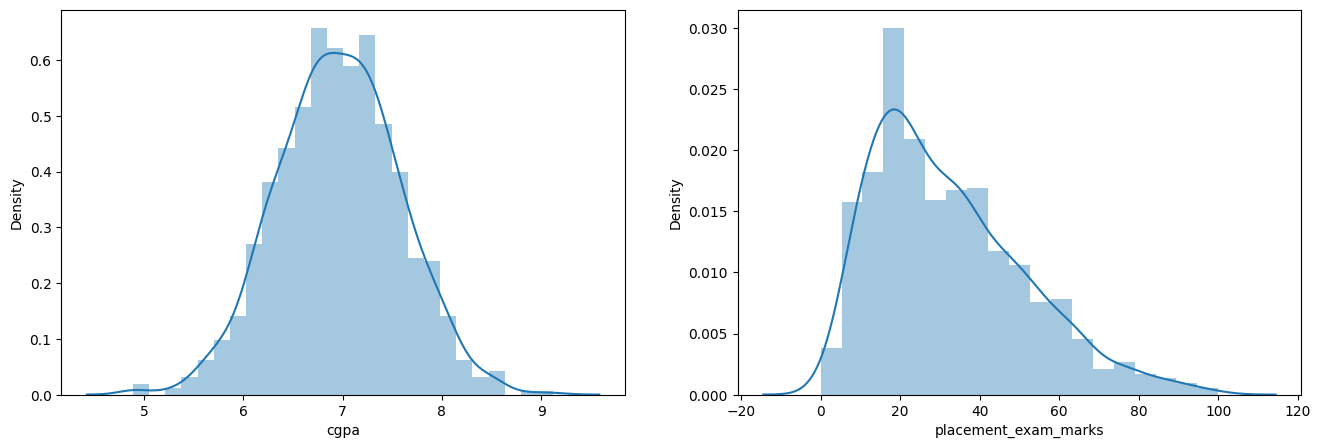

In [3]:
# distribution
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [5]:
# cgpa is normally distributed
# placement_exam_marks is not

print("Mean cgpa",df['cgpa'].mean())
print("STD cgpa",df['cgpa'].std())
print("Min cgpa", df['cgpa'].min())
print("Max cgpa", df['cgpa'].max())
print("Mean placement_exam_marks",df['placement_exam_marks'].mean())
print("STD placement_exam_marks",df['placement_exam_marks'].std())
print("Min placement_exam_marks", df['placement_exam_marks'].min())
print("Max placement_exam_marks", df['placement_exam_marks'].max())

Mean cgpa 6.96124
STD cgpa 0.6158978751323896
Min cgpa 4.89
Max cgpa 9.12
Mean placement_exam_marks 32.225
STD placement_exam_marks 19.13082233892112
Min placement_exam_marks 0.0
Max placement_exam_marks 100.0


In [6]:
#finding the boundary values
print("cgpa upper bound",df['cgpa'].mean() + 3*df['cgpa'].std())
print("cgpa lower bound",df['cgpa'].mean() - 3*df['cgpa'].std())

cgpa upper bound 8.808933625397168
cgpa lower bound 5.113546374602832


In [9]:
#finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

Trimming

In [10]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

In [11]:
df.shape, new_df.shape # as you can see 5 row is remove

((1000, 3), (995, 3))

In [12]:
# 2nd approch
# calculate the Z score
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore
0  7.19                  26.0       1     0.371425
1  7.46                  38.0       1     0.809810
2  7.54                  40.0       1     0.939701
3  6.42                   8.0       1    -0.878782
4  7.23                  17.0       0     0.436371

In [15]:
df[(df['cgpa_zscore']>3)|(df['cgpa_zscore']<-3)]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [16]:
# trimming
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]

In [17]:
df.shape, new_df.shape # as you can see 5 row is remove

((1000, 4), (995, 4))

Capping

In [18]:
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()

In [19]:
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [20]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit, #if my value is more then upper_limit
    upper_limit, #replace with upper limit
    np.where(
        df['cgpa']<lower_limit, #if my value lower than lower limit
        lower_limit, # replace with lower limit
        df['cgpa'] # if both condition doesnot match make remain as it is
        )
    )

In [22]:
df.shape

(1000, 4)

In [24]:
df.describe()

cgpa  placement_exam_marks       placed   cgpa_zscore
count  1000.000000           1000.000000  1000.000000  1.000000e+03
mean      6.961499             32.225000     0.489000 -1.465494e-16
std       0.612688             19.130822     0.500129  1.000000e+00
min       5.113546              0.000000     0.000000 -3.362960e+00
25%       6.550000             17.000000     0.000000 -6.677081e-01
50%       6.960000             28.000000     0.000000 -2.013321e-03
75%       7.370000             44.000000     1.000000  6.636815e-01
max       8.808934            100.000000     1.000000  3.505062e+00

### IQR
when data is skew we use IQR

wisker of boxplot:
1. min = Q1(25 per)-1.5*IQR
2. max = Q1(75 per)+1.5*IQR

value out of wisker is outliers

We will do trimming or capping


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/placement.csv')
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

<ipython-input-26-828fef352967>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-26-828fef352967>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


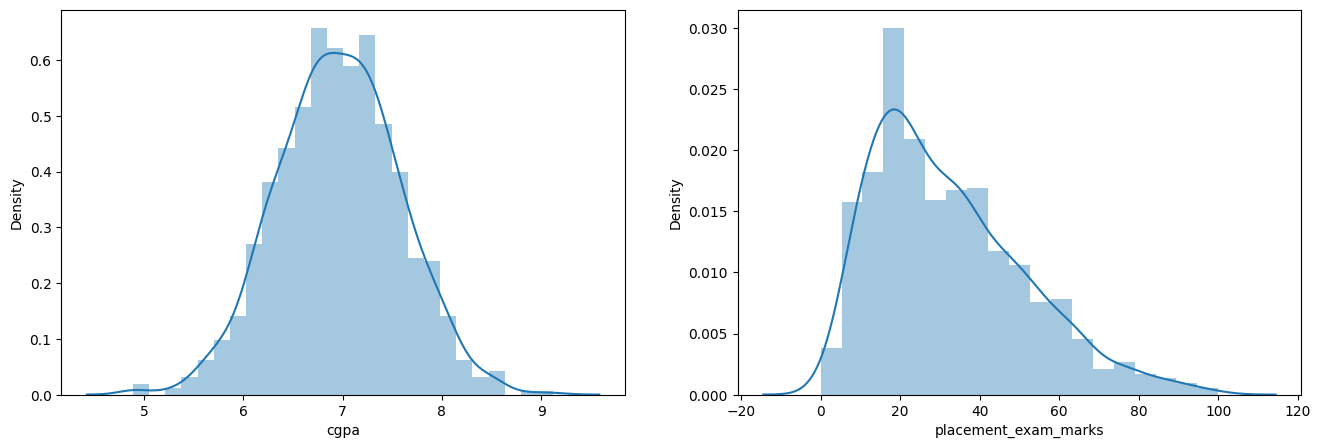

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [ ]:
# as we can see cgpa is normally distributed
# but placement_exam_marks is skew so we will use IQR to placement_exam_marks

In [27]:
print("Mean placement_exam_marks", df['placement_exam_marks'].mean())
print("STD placement_exam_marks", df['placement_exam_marks'].std())
print("Min placement_exam_marks", df['placement_exam_marks'].min())
print("Max placement_exam_marks", df['placement_exam_marks'].max())

Mean placement_exam_marks 32.225
STD placement_exam_marks 19.13082233892112
Min placement_exam_marks 0.0
Max placement_exam_marks 100.0


In [28]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

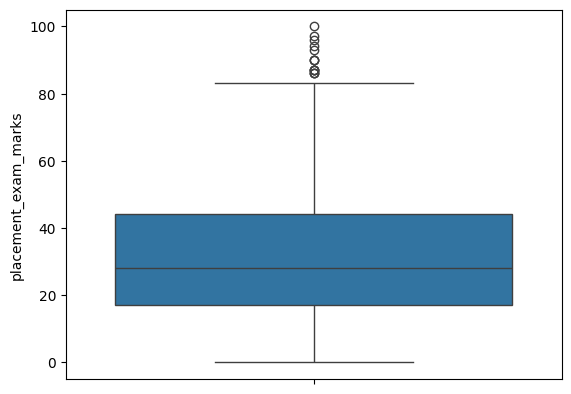

In [29]:
sns.boxplot(df['placement_exam_marks'])

In [31]:
#finding IQR
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
IQR=Q3-Q1
IQR

27.0

In [32]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [33]:
print("upper limit", upper_limit)
print("lower limit", lower_limit)

upper limit 84.5
lower limit -23.5


In [35]:
# looking at box plot we can see the outlier are at only beyond the upper_limit side
#not on the lower_limit

# outlier are
df[df['placement_exam_marks']> upper_limit]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

Trimming

In [36]:
new_df = df[df['placement_exam_marks']<upper_limit]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[985 rows x 3 columns]

capping

In [43]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [44]:
new_df_cap.shape

(1000, 3)

In [47]:
new_df_cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

<ipython-input-45-4336df809185>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-45-4336df809185>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


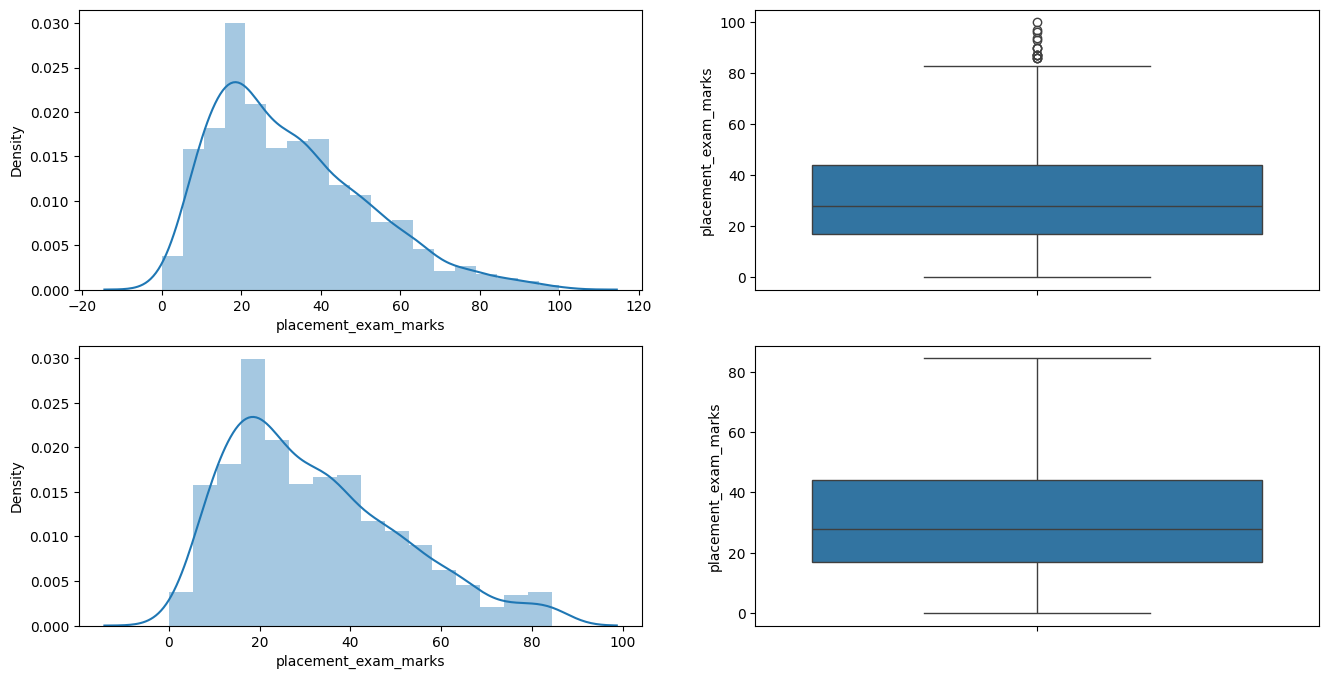

In [45]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

### Percentile
max- 95 means 100%

min -10 mean 0%

median = 50%

upper bond and lower is in percentile



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [49]:
df.shape

(10000, 3)

In [50]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

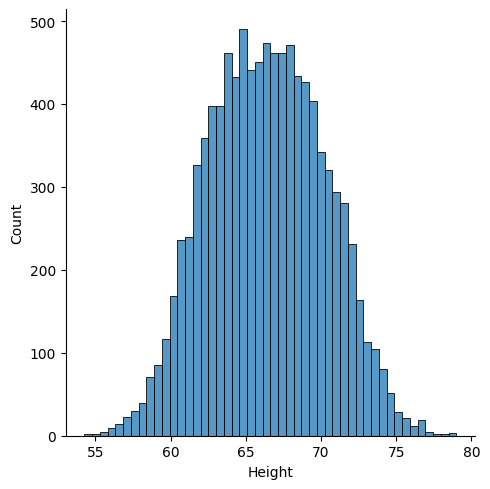

In [51]:
sns.displot(df['Height'])

<Axes: ylabel='Height'>

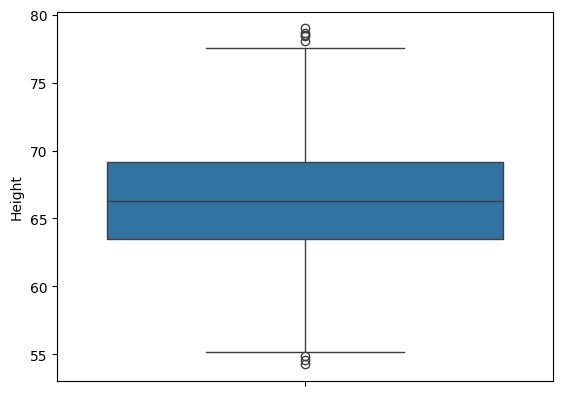

In [52]:
sns.boxplot(df['Height'])

In [53]:
# upper limit and lower limit
upper_limit=df['Height'].quantile(0.95)
lower_limit=df['Height'].quantile(0.05)

In [54]:
upper_limit, lower_limit

(72.61710606642384, 60.24622082610544)

In [60]:
#outliers
df[(df['Height']>=upper_limit) | (df['Height']<=lower_limit)]

Gender     Height      Weight
0       Male  73.847017  241.893563
2       Male  74.110105  212.740856
23      Male  75.205974  228.761781
27      Male  72.800844  206.828189
31      Male  74.033808  212.910225
...      ...        ...         ...
9978  Female  57.375759  114.192209
9984  Female  59.047029  111.707369
9988  Female  59.538729  121.244876
9993  Female  60.030434   97.687432
9994  Female  59.098250  110.529686

[1000 rows x 3 columns]

In [62]:
#trimming
new_df=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]
new_df

Gender     Height      Weight
1       Male  68.781904  162.310473
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9000 rows x 3 columns]

In [63]:
new_df.shape
new_df.describe()

Height       Weight
count  9000.000000  9000.000000
mean     66.354968   161.336165
std       3.165556    28.238348
min      60.246257    82.198488
25%      63.803914   137.963170
50%      66.318070   161.212928
75%      68.902716   184.769070
max      72.617038   230.560535

In [64]:
df.describe()

Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

<Axes: ylabel='Height'>

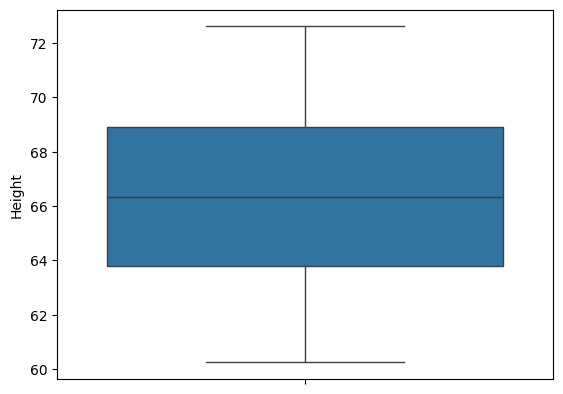

In [66]:
sns.boxplot(new_df['Height'])

###Winsorization (capping):
if 95 percentile is threshold then 95 percentile value is 70 then we will pick just below value to fill the outlier
this same happen in lower bound also

In [68]:
#capping is called winsorization

new_df_cap= np.where(df['Height']>upper_limit,
         upper_limit,
         np.where(df['Height']<= lower_limit,
                  lower_limit,
                  df['Height']))

## Feature scaling
- technique to standardize the independent features present in the data in a fixed range
scale or range of two or more data may be different range

KNN algo works on ecludian distance so so, when we working with 2 different scale model then value col which has higher range of scale will dominate other. So, we should scale.

generally, the scale range make -1 to +1

Scaling doesnot harm the model rather in some training model aglo it increase the accuracy.

in linear regression you must do scaling

in Decision tree classifier, random forest(tree based), GBoost, XGBoost accuracy remain same before and after scaling  

Type of scaling:
1. standardization
2. Normalization

### standardization
also called Z-score Normalization

transfrom each data:
```
Xi' = Xi-mean(X)/ sigma(standard devi)
```
so, when we take mean of Xi' after transformation, mean(Xi')=0 and standard devi = 1

two thing happen now= mean centering and scaling stad devi

In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
df=df.iloc[:,2:] #remove col
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [ ]:
df.sample(4) # random choosen dataset

Age  EstimatedSalary  Purchased
153   36            50000          0
346   53            72000          1
69    31            68000          0
75    34           112000          1

In [ ]:
# before scaling we need to do train_test split always
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to train set, it will learn the parameters from X_train
scaler.fit(X_train)
#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#we can also do fit and transform at once
#X_train_scaled=scaler.fit_transform(X_train)

scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [ ]:
# changeing into numpy array to df
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

Age  EstimatedSalary
0 -1.066752        -0.386344
1  0.797535        -1.229939
2  0.110692         1.853544
3  0.601294        -0.909955
4  1.876859        -1.288118

In [ ]:
X_train_scaled.describe().round(2)

Age  EstimatedSalary
count  320.00           320.00
mean    -0.00             0.00
std      1.00             1.00
min     -1.95            -1.61
25%     -0.77            -0.79
50%     -0.09             0.02
75%      0.70             0.52
max      2.17             2.32

In [ ]:
X_train.describe().round(2)

Age  EstimatedSalary
count  320.00           320.00
mean    37.87         70281.25
std     10.21         34430.55
min     18.00         15000.00
25%     30.00         43000.00
50%     37.00         71000.00
75%     45.00         88000.00
max     60.00        150000.00

#### effect of scale

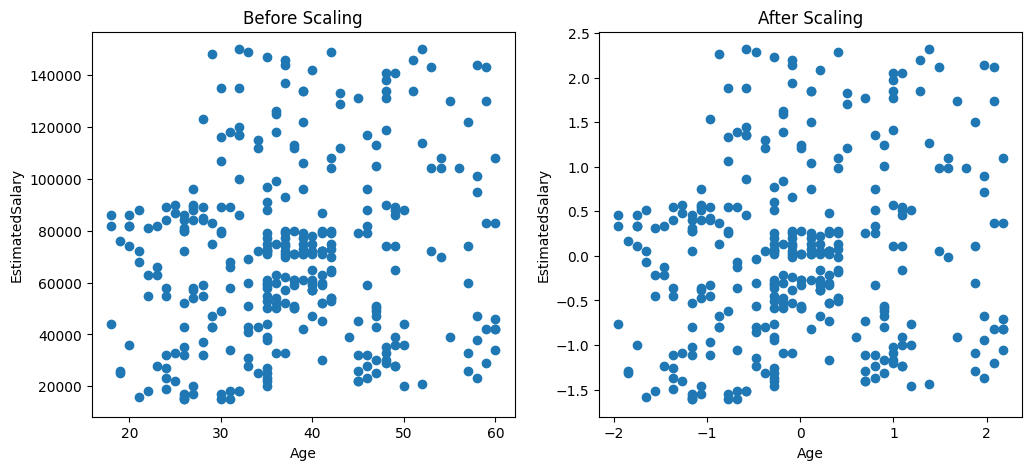

In [ ]:
# data spread doesnot change after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
plt.show()

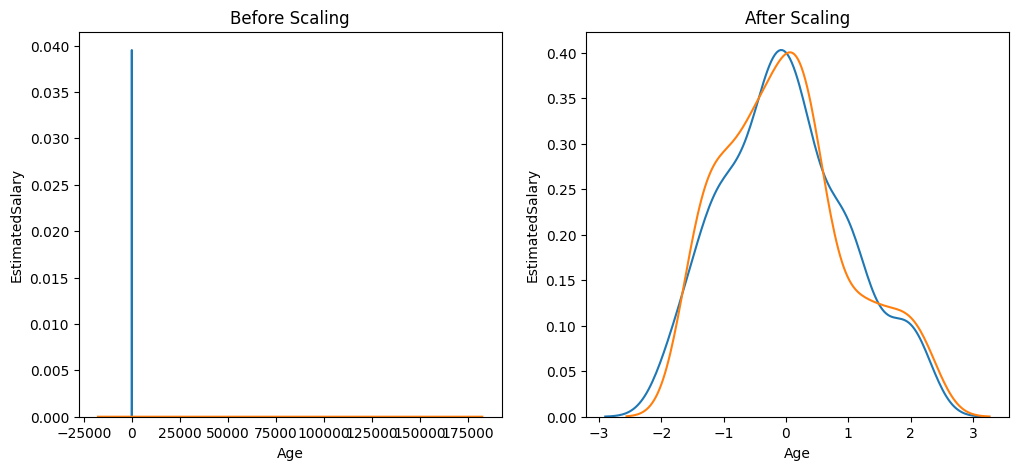

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
#after scaling
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

before, age and salary are incompareable

but after, we can compare since both are in same scale

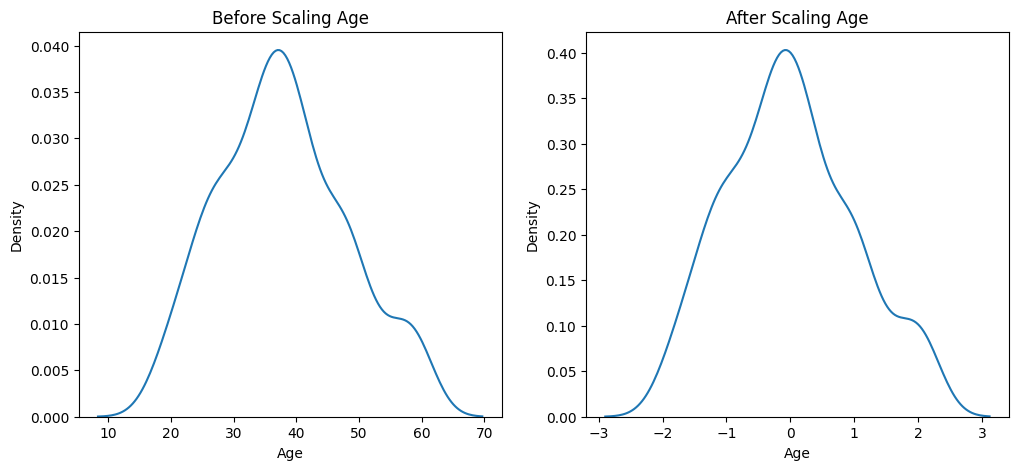

In [ ]:
# Distribution of each entity is same before and after the scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling Age')
sns.kdeplot(X_train['Age'], ax=ax1)
#after scaling
ax2.set_title('After Scaling Age')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

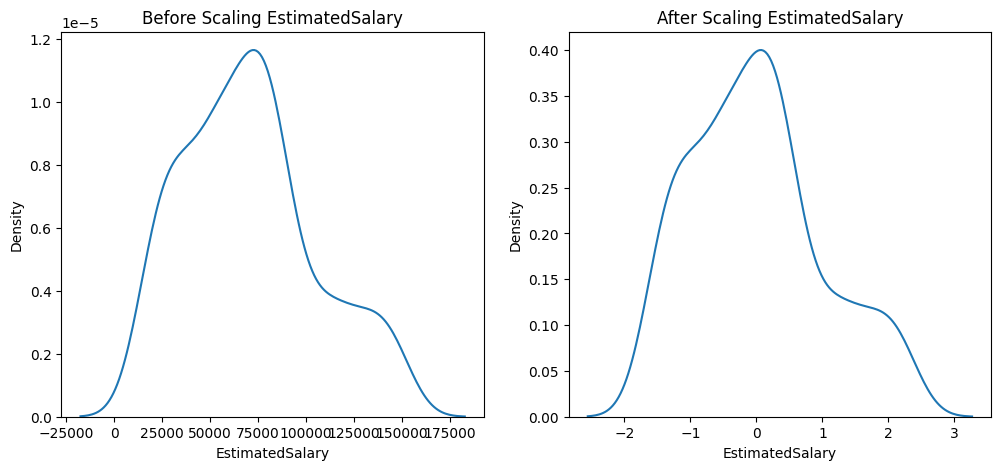

In [ ]:
# Distribution of each entity is same before and after the scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling EstimatedSalary')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
#after scaling
ax2.set_title('After Scaling EstimatedSalary')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#### When to use standardization
1. K-Means= Use the euclidean Distance measure
2. K-Nearest-Neighbours = Measure the distance between pairs of samples and these distances are influenced by the measurement units
3. Principal Component Analysis(PCA) = try to get the feature with maximum variance
4. Artificial Neural Network  = Apply Gradient Descent
5. Gradient Descent = Theta calculation becomes faster after feature scaling and the learning rate in the update equation of Stochastic Gradient Descent is the same for every parameter

### Normalization
technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numerical col in the dataset to use common scale, without distorting differences in the range of  values or losing information.

#### MinMax Scaling
scaling formula
Xi'= (Xi - Xmin)/(Xmax-Xmin)

range will always between 0 to 1



In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# we pick only 0,1,2 col and data directly start from data since their is no header
# so, first data is data is automatically taken as head
# which we need to tell that there is no header so it see as dataset
df_norm = pd.read_csv('/content/wine_data.csv',header=None, usecols=[0,1,2])
#we add header of each selected col
df_norm.columns=['Class label', 'Alcohol', 'Malic acid']
df_norm.head()

Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

<Axes: xlabel='Alcohol', ylabel='Density'>

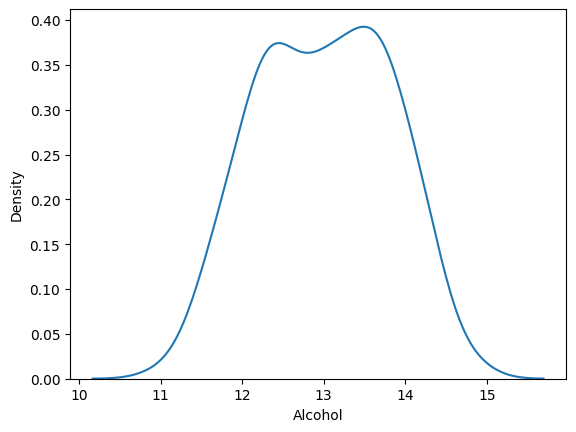

In [ ]:
sns.kdeplot(df_norm['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

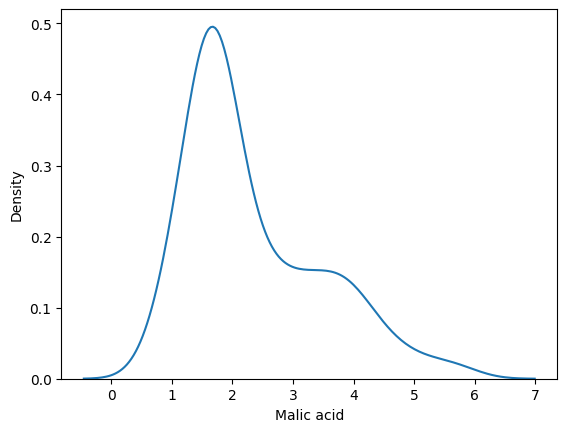

In [ ]:
sns.kdeplot(df_norm['Malic acid'])

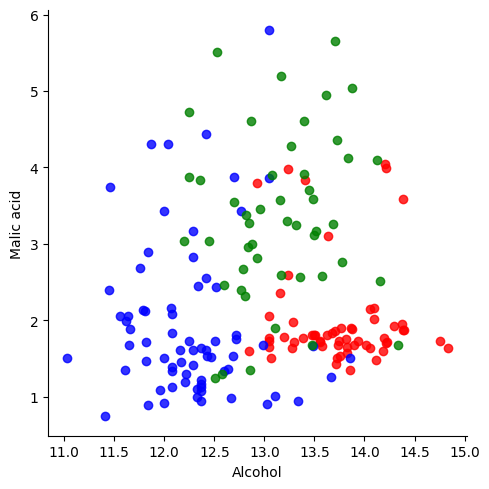

In [ ]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.lmplot(x='Alcohol', y='Malic acid', data=df_norm, fit_reg=False, hue='Class label', legend=False, palette=color_dict)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('Class label', axis=1), df_norm['Class label'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((142, 2), (36, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#fit
scaler.fit(X_train)
#transform
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#numpy array to pd
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

Alcohol  Malic acid
0  0.871053    0.160896
1  0.394737    0.940937
2  0.352632    0.036660
3  0.644737    0.158859
4  0.536842    0.124236

In [ ]:
X_train_scaled.describe().round(2)

Alcohol  Malic acid
count   142.00      142.00
mean      0.51        0.30
std       0.22        0.23
min       0.00        0.00
25%       0.34        0.15
50%       0.52        0.20
75%       0.70        0.46
max       1.00        1.00

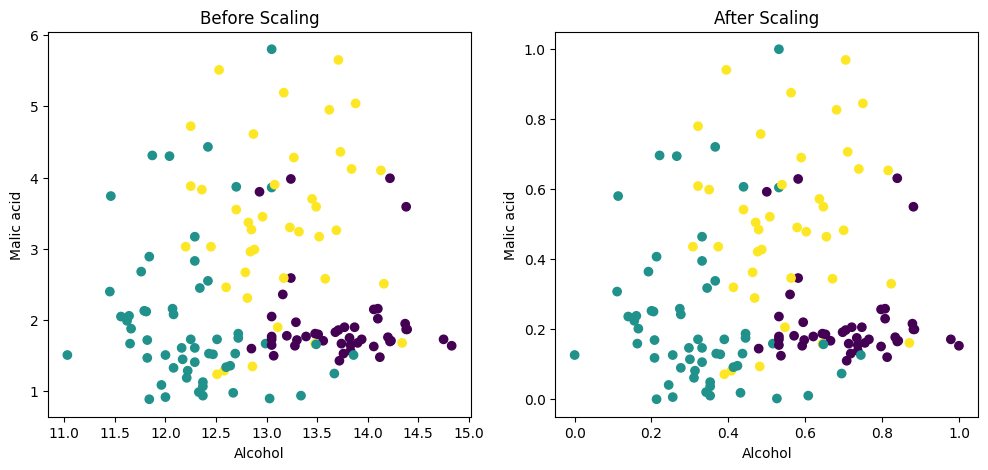

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')
plt.show()

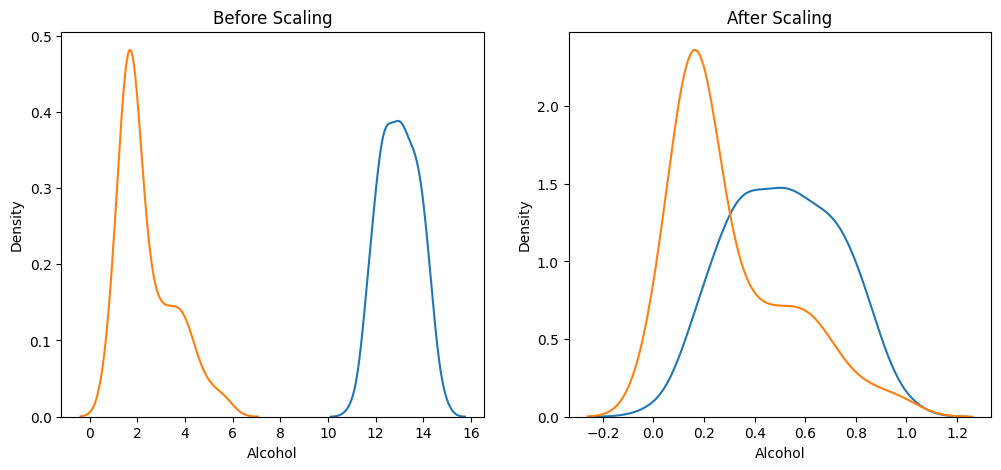

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

when you have outlier it will also squeeze so, remove the outlier forehand.

#### Mean Normalization
Xi' = Xi-Xmean/ Xmax-Xmin

we are doing mean centering

range = -1 to 1

value less than mean= -ve

value more than mean = +ve

use where you need center data


#### Max absoulte
Xi'= Xi/|Xmax|

MaxAbsScaling

sparse data = using in data where there are many zero value(input)



#### Robust scaling

Xi'= Xi - Xmedian / IQR
- Robust to outliers
If your data have lot of outliers than you should try to use this because generally it perform good.



### Standardization vs Normalization
Most of the problem perform good with Standardization

MinMax is use when you min and max of daa= use CNN img

outlier use = roboust

sparse matrix(Matrix types having most of their elements set to zero) use =max abs


## Handaling mix value


In [ ]:
## Handaling mix value
import numpy as np
import pandas as pd
df=pd.read_csv('/content/titanic.csv')
df.head()

Cabin            Ticket number  Survived
0   NaN         A/5 21171      5         0
1   C85          PC 17599      3         1
2   NaN  STON/O2. 3101282      6         1
3  C123            113803      3         1
4   NaN            373450      A         0

In [ ]:
# As you can see in cabin, number and ticket there is mix value
# first lets work on number
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

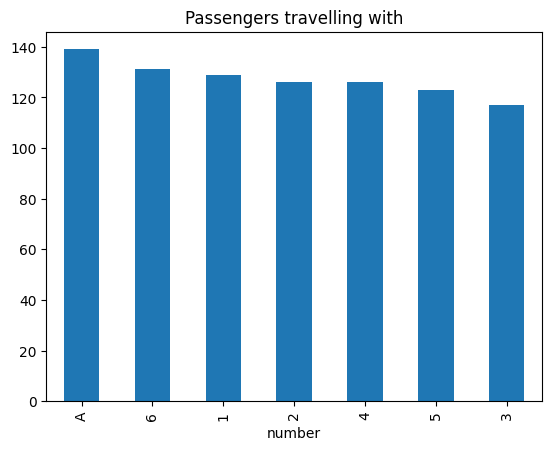

In [ ]:
fig=df['number'].value_counts().plot(kind='bar')
fig.set_title('Passengers travelling with')

In [ ]:
# extract numerical part
#This function attempts to convert the values in the number column of the DataFrame df to a numeric type.
#errors='coerce' means that any values that cannot be converted to a number will be replaced with NaN.
#downcast='integer' attempts to convert the result to the smallest possible integer type (e.g., int32, int64).
df['number_numerical']=pd.to_numeric(df['number'], errors='coerce', downcast='integer')

In [ ]:
# make a categotical col where if there is nan in 'number_numerical' col then place the value of 'number' col
# otherwise place nan
df['number_cate']=np.where(df['number_numerical'].isnull(), df['number'], np.nan)
df.head()

Cabin            Ticket number  Survived  number_numerical number_cate
0   NaN         A/5 21171      5         0               5.0         NaN
1   C85          PC 17599      3         1               3.0         NaN
2   NaN  STON/O2. 3101282      6         1               6.0         NaN
3  C123            113803      3         1               3.0         NaN
4   NaN            373450      A         0               NaN           A

In [ ]:
#now cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat']=df['Cabin'].str[0] # capture the first letter
df.head()

Cabin            Ticket number  Survived  number_numerical number_cate  \
0   NaN         A/5 21171      5         0               5.0         NaN   
1   C85          PC 17599      3         1               3.0         NaN   
2   NaN  STON/O2. 3101282      6         1               6.0         NaN   
3  C123            113803      3         1               3.0         NaN   
4   NaN            373450      A         0               NaN           A   

  cabin_num cabin_cat  
0       NaN       NaN  
1        85         C  
2       NaN       NaN  
3       123         C  
4       NaN       NaN

In [ ]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(10)

Cabin            Ticket number  Survived  number_numerical number_cate  \
0   NaN         A/5 21171      5         0               5.0         NaN   
1   C85          PC 17599      3         1               3.0         NaN   
2   NaN  STON/O2. 3101282      6         1               6.0         NaN   
3  C123            113803      3         1               3.0         NaN   
4   NaN            373450      A         0               NaN           A   
5   NaN            330877      2         0               2.0         NaN   
6   E46             17463      2         0               2.0         NaN   
7   NaN            349909      5         0               5.0         NaN   
8   NaN            347742      1         1               1.0         NaN   
9   NaN            237736      A         1               NaN           A   

  cabin_num cabin_cat  ticket_num ticket_cat  
0       NaN       NaN     21171.0        A/5  
1        85         C     17599.0         PC  
2       NaN       NaN   3101282.0   STON/O2.  
3       123         C    113803.0        NaN  
4       NaN       NaN    373450.0        NaN  
5       NaN       NaN    330877.0        NaN  
6        46         E     17463.0        NaN  
7       NaN       NaN    349909.0        NaN  
8       NaN       NaN    347742.0        NaN  
9       NaN       NaN    237736.0        NaN

## handling data and time


In [ ]:
import numpy as np
import pandas as pd

date=pd.read_csv('orders.csv')
time=pd.read_csv('messages.csv')

In [ ]:
date.head()

date  product_id  city_id  orders
0  2019-12-10        5628       25       3
1  2018-08-15        3646       14     157
2  2018-10-23        1859       25       1
3  2019-08-17        7292       25       1
4  2019-01-06        4344       25       3

In [ ]:
time.head()

date                                                msg
0  2013-12-15 00:50:00                           ищу на сегодня мужика 37
1  2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2  2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576
3  2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4  2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


**working with date**

In [ ]:
# usally in df date and time is in string
# convert string to date and time so you can do transformation
#convet to datetime dtype
date['date']=pd.to_datetime(date['date'])

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [ ]:
#extract year
date['date_year']=date['date'].dt.year
date.sample(5)

date  product_id  city_id  orders  date_year
445 2019-10-14        4192       14      59       2019
474 2019-11-01        3967        2      12       2019
803 2019-11-09        5296        0      30       2019
14  2019-05-29        3833       26     240       2019
309 2019-08-14        4352       16       1       2019

In [ ]:
#extract month
date['date_month_name']= date['date'].dt.month_name()
date.head()

date  product_id  city_id  orders  date_year date_month_name
0 2019-12-10        5628       25       3       2019        December
1 2018-08-15        3646       14     157       2018          August
2 2018-10-23        1859       25       1       2018         October
3 2019-08-17        7292       25       1       2019          August
4 2019-01-06        4344       25       3       2019         January

In [ ]:
#extract days
date['date_day']=date['date'].dt.day
date.head()

date  product_id  city_id  orders  date_year date_month_name  date_day
0 2019-12-10        5628       25       3       2019        December        10
1 2018-08-15        3646       14     157       2018          August        15
2 2018-10-23        1859       25       1       2018         October        23
3 2019-08-17        7292       25       1       2019          August        17
4 2019-01-06        4344       25       3       2019         January         6

In [ ]:
#day of week
date['date_dow_name']=date['date'].dt.day_name()
date.head()

date  product_id  city_id  orders  date_year date_month_name  \
0 2019-12-10        5628       25       3       2019        December   
1 2018-08-15        3646       14     157       2018          August   
2 2018-10-23        1859       25       1       2018         October   
3 2019-08-17        7292       25       1       2019          August   
4 2019-01-06        4344       25       3       2019         January   

   date_day date_dow_name  
0        10       Tuesday  
1        15     Wednesday  
2        23       Tuesday  
3        17      Saturday  
4         6        Sunday

In [ ]:
# is weekend or not
date['date_is_weekend']=np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)
date.head()


date  product_id  city_id  orders  date_year date_month_name  \
0 2019-12-10        5628       25       3       2019        December   
1 2018-08-15        3646       14     157       2018          August   
2 2018-10-23        1859       25       1       2018         October   
3 2019-08-17        7292       25       1       2019          August   
4 2019-01-06        4344       25       3       2019         January   

   date_day date_dow_name  date_is_weekend  
0        10       Tuesday                0  
1        15     Wednesday                0  
2        23       Tuesday                0  
3        17      Saturday                1  
4         6        Sunday                1

In [ ]:
# extract time elapsed between date
import datetime
today= datetime.datetime.today()
today

datetime.datetime(2024, 8, 25, 10, 59, 6, 604477)

In [ ]:
time_spent = today-date['date']
time_spent

0     1720 days 10:59:06.604477
1     2202 days 10:59:06.604477
2     2133 days 10:59:06.604477
3     1835 days 10:59:06.604477
4     2058 days 10:59:06.604477
                 ...           
995   2148 days 10:59:06.604477
996   2089 days 10:59:06.604477
997   1937 days 10:59:06.604477
998   2002 days 10:59:06.604477
999   1776 days 10:59:06.604477
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
#day passed
time_spent.dt.days

0      1720
1      2202
2      2133
3      1835
4      2058
       ... 
995    2148
996    2089
997    1937
998    2002
999    1776
Name: date, Length: 1000, dtype: int64

In [ ]:
#month passed
time_spent.dt.days/30


0      57.333333
1      73.400000
2      71.100000
3      61.166667
4      68.600000
         ...    
995    71.600000
996    69.633333
997    64.566667
998    66.733333
999    59.200000
Name: date, Length: 1000, dtype: float64

In [ ]:
time.sample(5)

date                                                msg
764  2013-11-09 01:38:00  Девушки женщины пишите звоните пообщаемся встр...
109  2014-11-07 00:55:00                Зацелую мужчину до 65! Мне 34  Анна
313  2012-05-02 00:25:00  Симпатичный парень 22 ищет нескромную милашку ...
949  2013-04-17 23:59:00               ищу дев для прият встречь 0632508994
922  2012-11-11 23:14:00  Муж.50л познок.с Жен. место есть.Не спонсор.09...

In [ ]:
#covert to datetime dtype
time['date']=pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [ ]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second
time['time']= time['date'].dt.time
time.head()

date                                                msg  \
0 2013-12-15 00:50:00                           ищу на сегодня мужика 37   
1 2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826   
2 2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576   
3 2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...   
4 2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше   

   hour  min  sec      time  
0     0   50    0  00:50:00  
1    23   40    0  23:40:00  
2     0   21    0  00:21:00  
3     0   31    0  00:31:00  
4    23   11    0  23:11:00

In [ ]:
#time diff
time_diff=  today - time['date']

In [ ]:
#time diff in second
time_diff/np.timedelta64(1, 's')

0      3.375149e+08
1      3.257687e+08
2      3.677567e+08
3      3.074489e+08
4      3.417545e+08
           ...     
995    3.927245e+08
996    3.340647e+08
997    3.742393e+08
998    3.842619e+08
999    3.213632e+08
Name: date, Length: 1000, dtype: float64

In [ ]:
# in hours
(today - time['date'])/np.timedelta64(1,'h')

0       93754.151835
1       90491.318501
2      102154.635168
3       85402.468501
4       94931.801835
           ...      
995    109090.151835
996     92795.751835
997    103955.368501
998    106739.418501
999     89267.568501
Name: date, Length: 1000, dtype: float64

##Column Tranformer
this is a technique which help to solve all feature transformer problem of all column at once.

It allows us to create and apply different transformations to specific columns of our data.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/covid_toy.csv')
df.head()

age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

gender= nominal cate data

fever= numerical but 10 value is missing

cough = ordinal cate data

city = nominal cate data

if there is no 'column transformer' we need to transform each column one after another and at the end we need to use np.concatenate((colname), axis=1). this is going to be long process.

but with the column transformer we can do data once

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# we have two option for remaining col
# we can 'drop' means remove or 'passthrough' means let it remain
# while passing transformer we need to pass in tuple
transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']), # variable you want save, transformer you want to use, in which column
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'city'])
], remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('has_covid', axis=1), df['has_covid'], test_size=0.2, random_state=42)

In [ ]:
transformer.fit_transform(X_train).shape

(80, 7)

## Mathematical transform
applying mathematical formula in the col of data and transform

model performance increases after appyly

the distribution of data (pdf) converted to normal distribution

stats algo of ml want normal distribution data



###Function transformer:

How to find if data is normal?
- call
sns.distplot to know it is normally distributed or bot
- call pandas skewness: pd.skew() =0 is okay. if neg or pos then slew
- do QQ plot

**QQ plot** :  a graphical method for determining if a dataset follows a certain probability distribution or whether two samples of data came from the same population or not. Q-Q plots are particularly useful for assessing whether a dataset is normally distributed or if it follows some other known distribution

Quantiles are points in a dataset that divide the data into intervals containing equal probabilities or proportions of the total distribution.

Exploring distribution similarity using Q-Q plots is a fundamental task in statistics. Comparing two datasets to determine if they originate from the same distribution is vital for various analytical purposes. When the assumption of a common distribution holds, merging datasets can improve parameter estimation accuracy, such as for location and scale. Q-Q plots, short for quantile-quantile plots, offer a visual method for assessing distribution similarity. In these plots, quantiles from one dataset are plotted against quantiles from another. If the points closely align along a diagonal line, it suggests similarity between the distributions. Deviations from this diagonal line indicate differences in distribution characteristics.


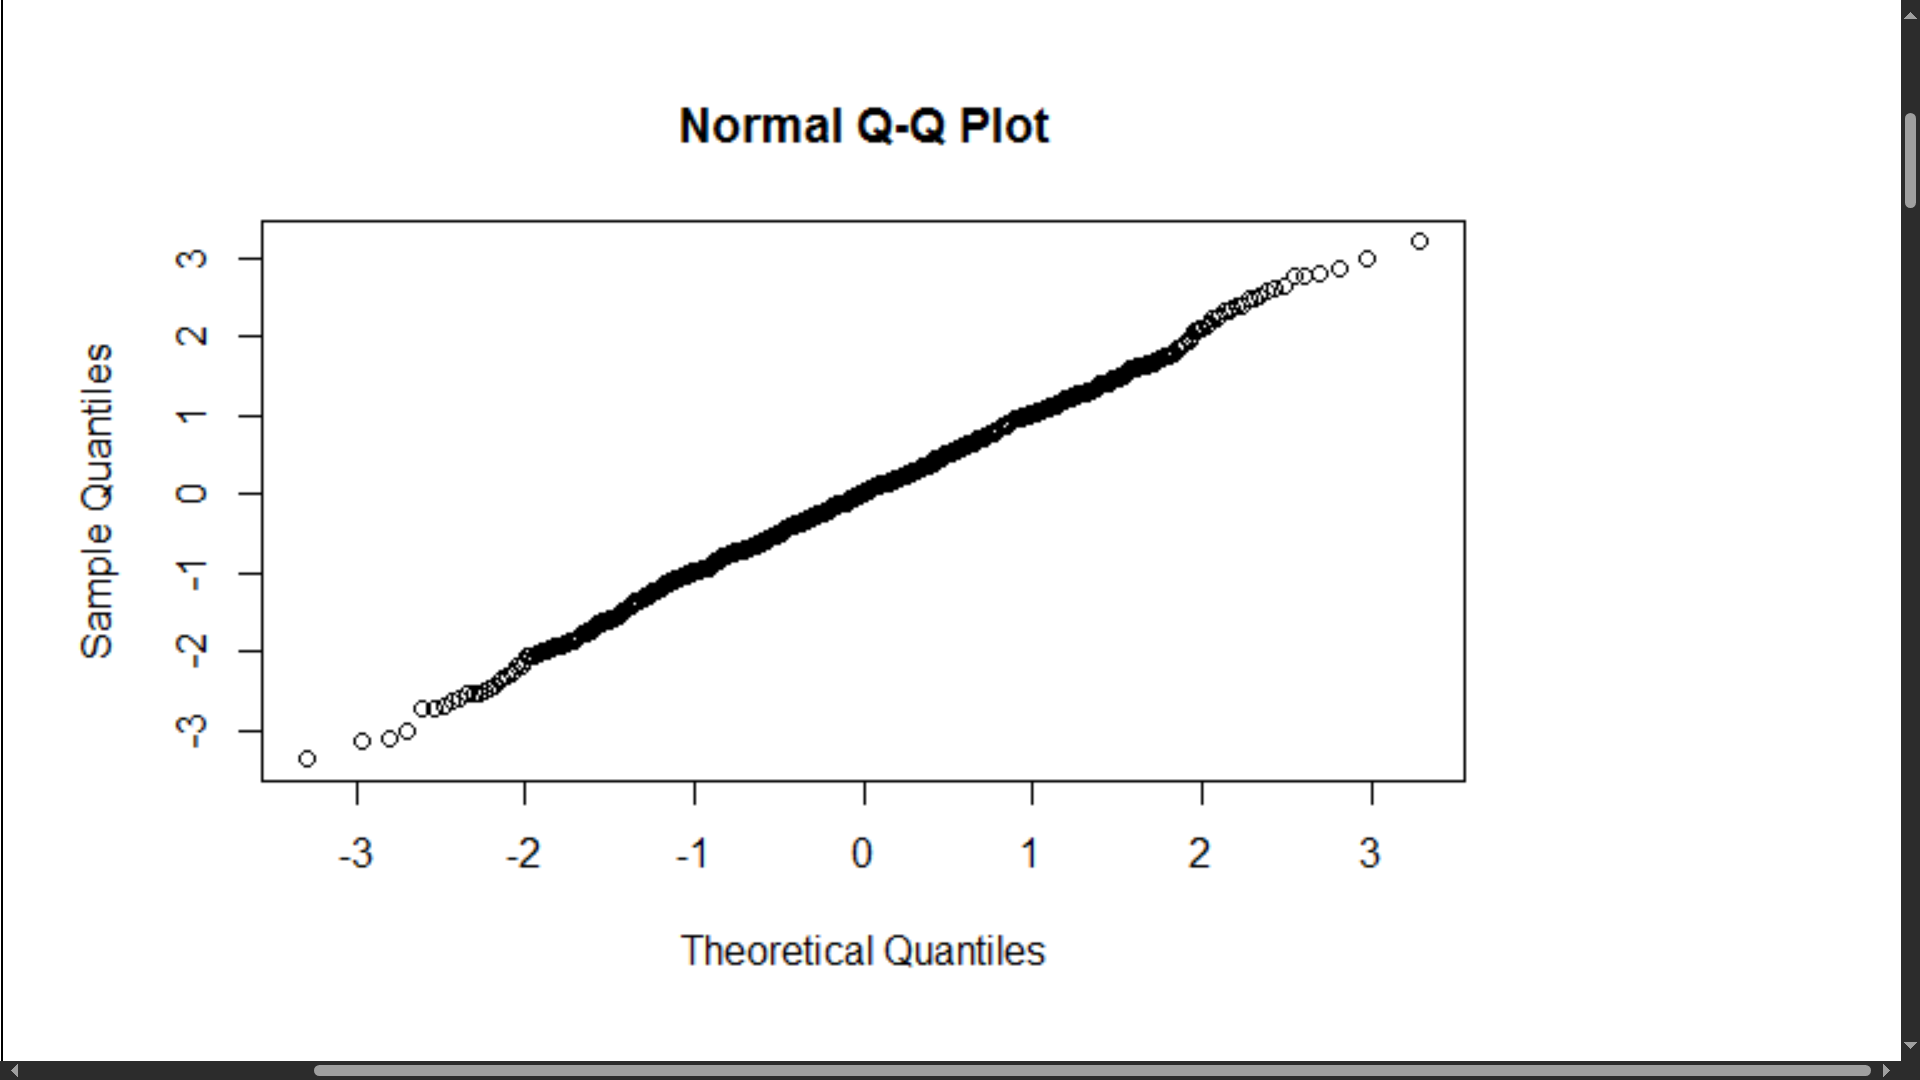

if the line is st, it is normally distributed


#### log transform
to put log transform, we take the log of each value
- by taking log tranformation the data will br normally distributed
- log transformer cannot be use in -ve value
- it is used for right skews data so, it can make in center
- all values comes in equvalent scale

#### Reciprocal tran
1/x

all big values become small and vice-versa

doesnot work with value zero


#### square and square root transform
x^2(sq) = has a moderate effect on distribution shape and it could be used to reduce left skewness.


sqrt(x) = Applied to positive values only. Hence, observe the values of column before applying.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
X =df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-9-c592f049b4f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


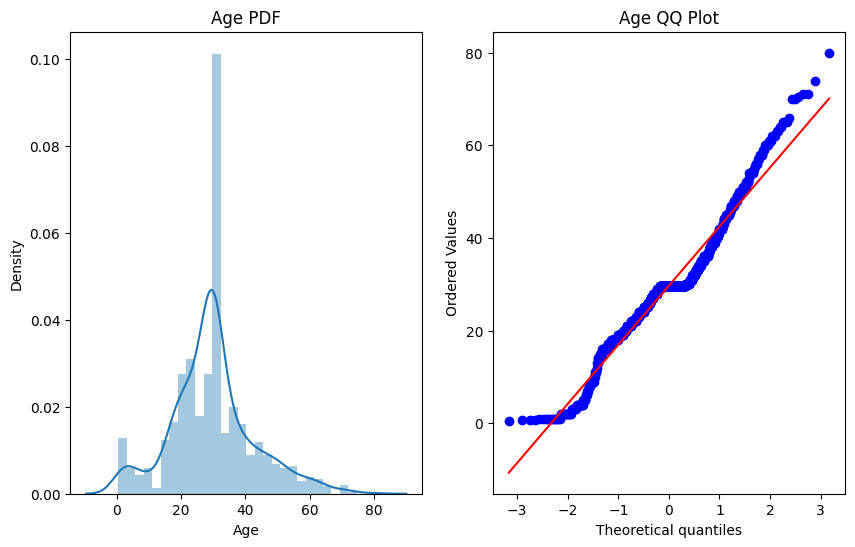

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(df['Age'], dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-10-2407c2ff3e2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


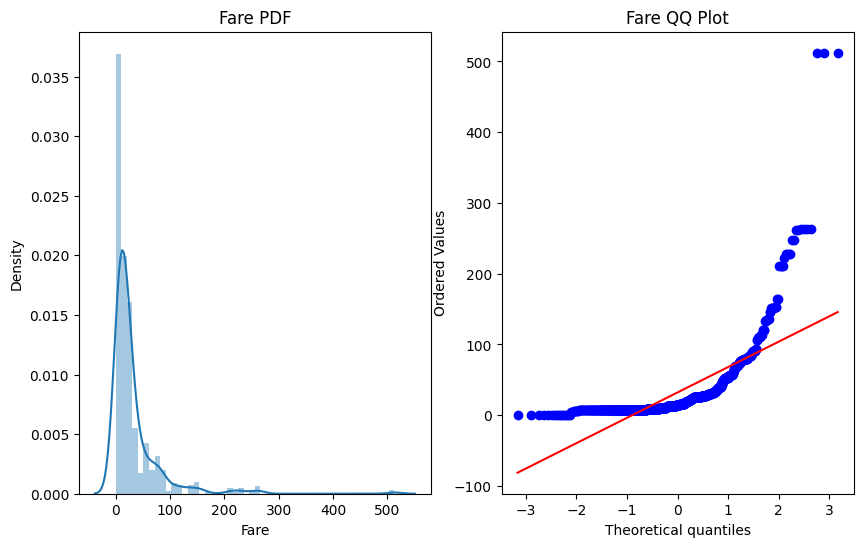

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(df['Fare'], dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [ ]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6480446927374302
Decision Tree accuracy 0.6759776536312849


In [ ]:
# func=log1p means add 1 in the value X so
#if x= 0 then it wont show error which in case log shows
trf = FunctionTransformer(func=np.log1p)

In [ ]:
# now lets try using func trans
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf_fun = LogisticRegression()
clf2_fun = DecisionTreeClassifier()
clf_fun.fit(X_train_transformed,y_train)
clf2_fun.fit(X_train_transformed,y_train)
y_pred = clf_fun.predict(X_test_transformed)
y_pred2 = clf2_fun.predict(X_test_transformed)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6815642458100558
Decision Tree accuracy 0.6871508379888268


We can improvement. since in DT it doesnot matter but in LR it is improve after function tranformation

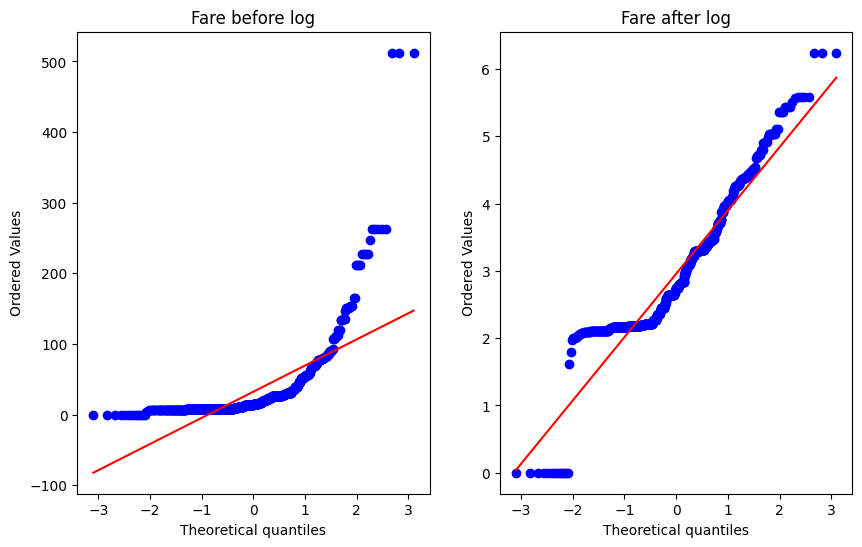

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm",plot=plt)
plt.title('Fare before log')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm",plot=plt)
plt.title('Fare after log')
plt.show()
# since it is right skew, using log has imporved

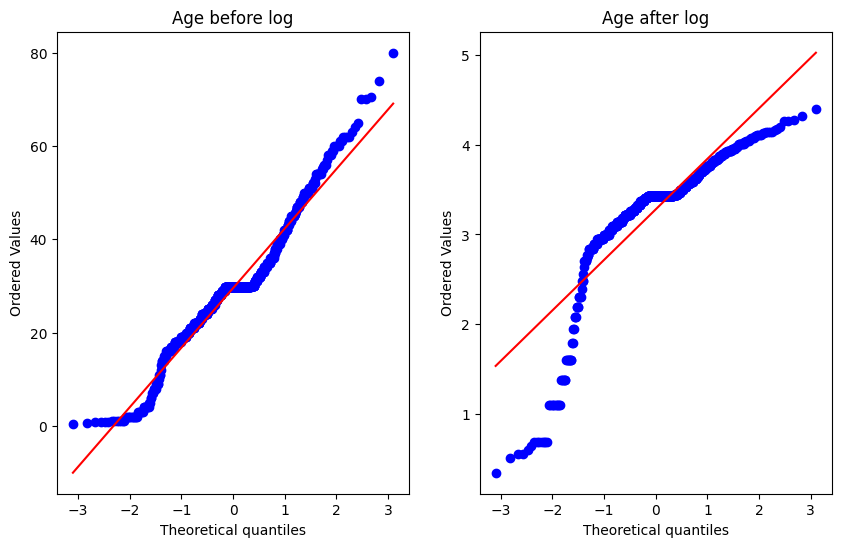

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm",plot=plt)
plt.title('Age before log')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm",plot=plt)
plt.title('Age after log')
plt.show()
# age was already normally distributed so, it will just make worst after log

In [ ]:
# so now let only put on fun trans log in fare only
trf2 = ColumnTransformer([
    ('fun',FunctionTransformer(func=np.log1p),['Fare'])
],remainder='passthrough')
X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed = trf2.transform(X_test)
clf_fun = LogisticRegression()
clf2_fun = DecisionTreeClassifier()
y_pred = clf_fun.fit(X_train_transformed,y_train).predict(X_test_transformed)
y_pred2 = clf2_fun.fit(X_train_transformed,y_train).predict(X_test_transformed)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6703910614525139
Decision Tree accuracy 0.659217877094972


#### Custom transform

In [ ]:
def apply_transform(transform):
  X = df.iloc[:, 1:3]
  y = df.iloc[:, 0]
  trf = ColumnTransformer([
      ('log', FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')
  X_trans = trf.fit_transform(X)
  clf = LogisticRegression()
  print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))
  plt.figure(figsize=(10,6))
  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm",plot=plt)
  plt.title('Fare before Transform')
  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm",plot=plt)
  plt.title('Fare after Transform')
  plt.show()

Accuracy 0.6589013732833957


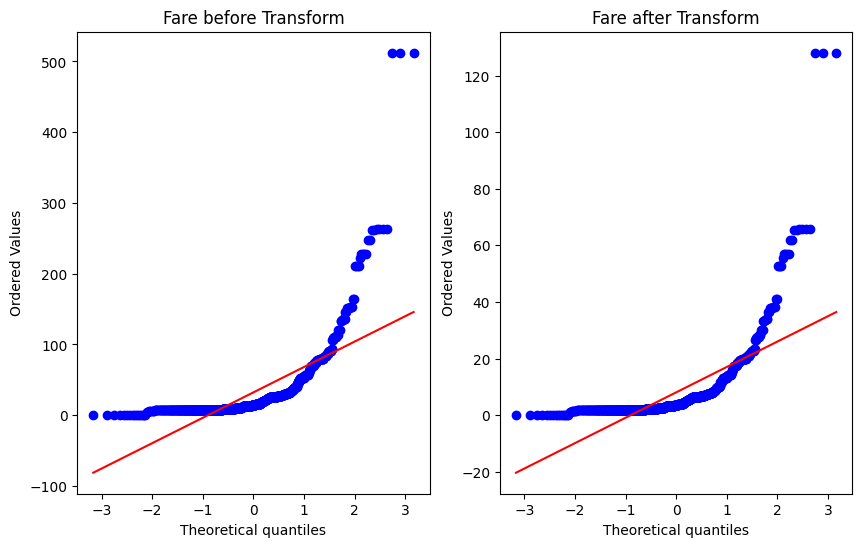

In [ ]:
apply_transform(lambda x: x**1/4)

### power transform



**Box-Cox transform**

Xipower(lambda)= { (xipower(lambda)  - 1 )/ lambda if lambda not = 0, ln(xi) if lambda=0,}

the exponent here is a variable called lambda that varies over the range of -5 to 5, and in the process of searching, we examine all values of lambda. Finally, we choose the optimal value (resulting in the best approx to a normal distribution) for your variable.

thr optimal parameter for stabilizing variance and minimizing skewness is estimated through
1. max likelyhood or,
2. bayesian

by default, unit-variance normalization to the transformed output


This transform is applicable only number greater than zero (n>0)

to solve this yeo-johson is created


**yeo-johnson transform**
it an adjustment to the box -xox tranformation, by which we can apply it to negetive number
https://miro.medium.com/v2/0*Bht6xgGpXIe7TSQA.png

1. use power transformation class
2. try both transformation



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv('/content/concrete_data.csv')
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.describe()
# as we can see min is zero in some col that means there is 0 in value

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [ ]:
X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# applying regression without transformation
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
# cross checking with cross val score
lr=LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


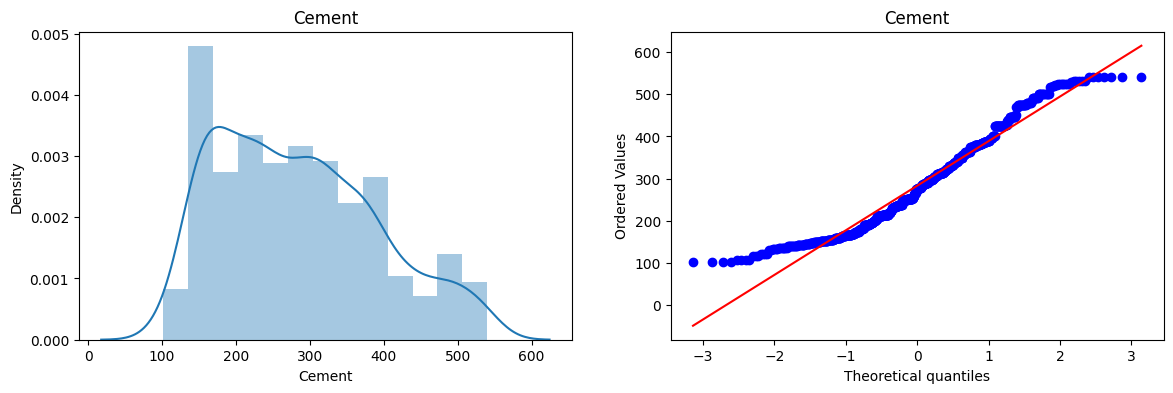

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


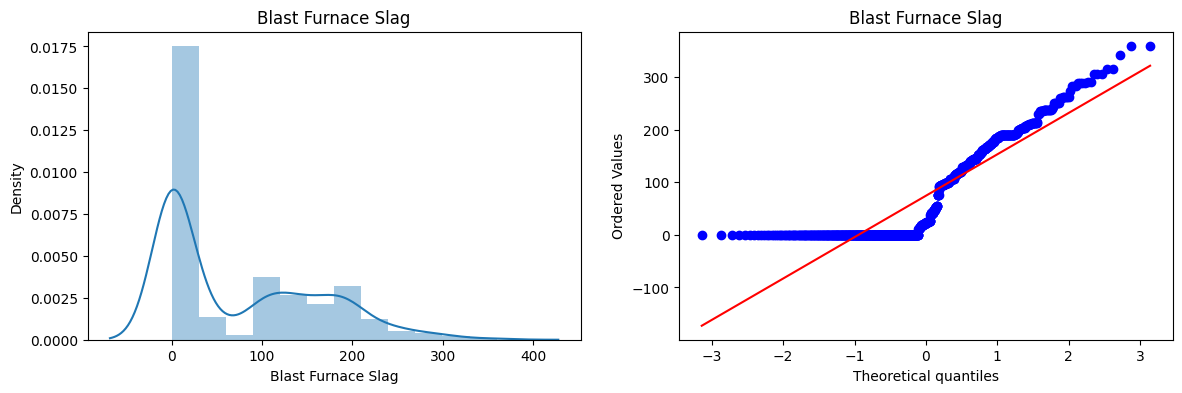

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


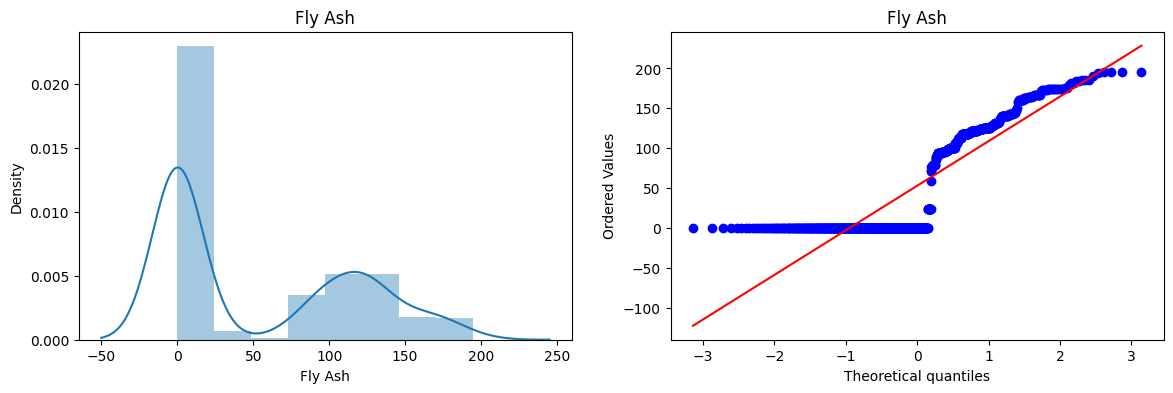

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


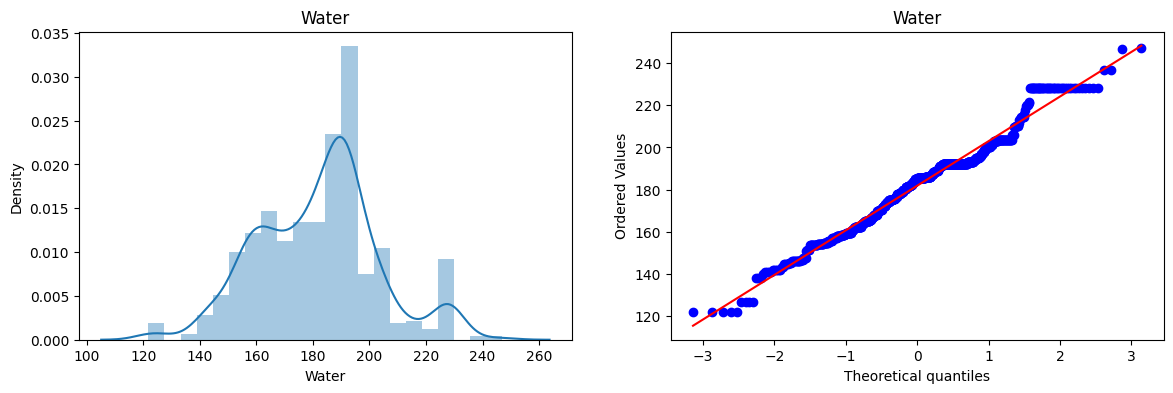

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


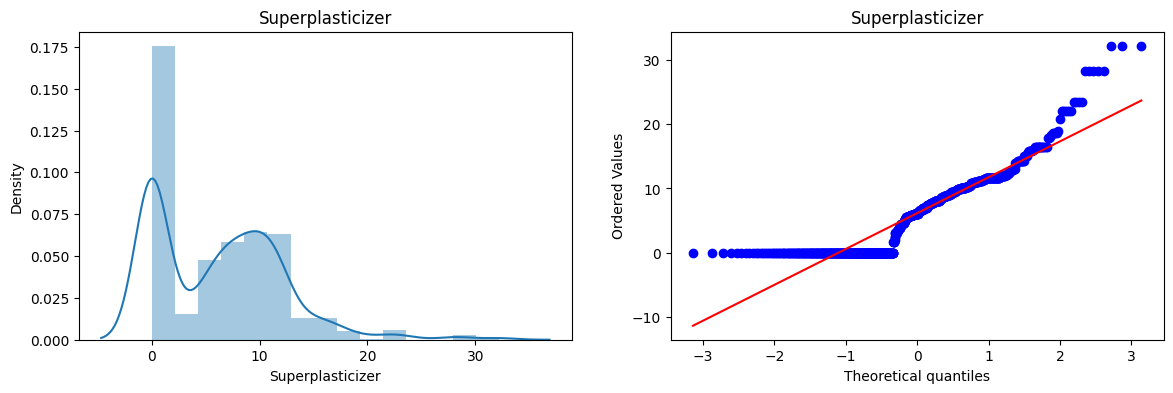

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


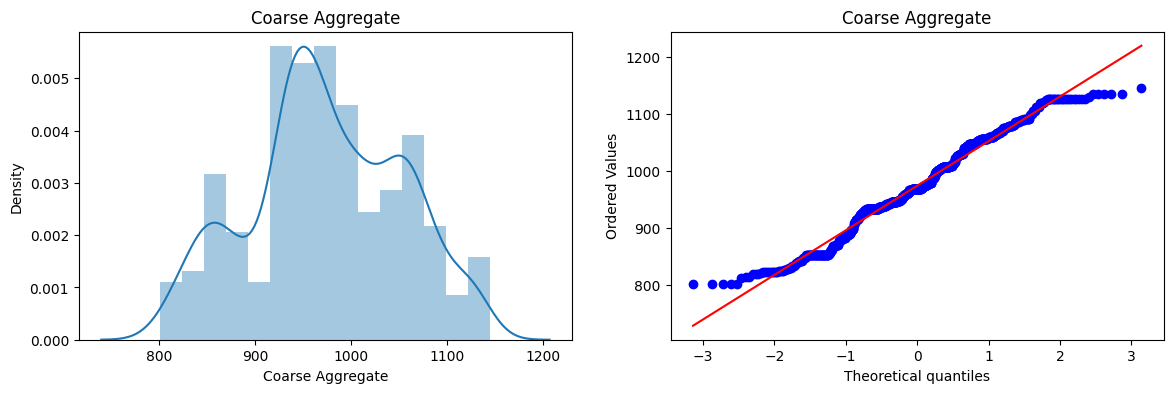

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


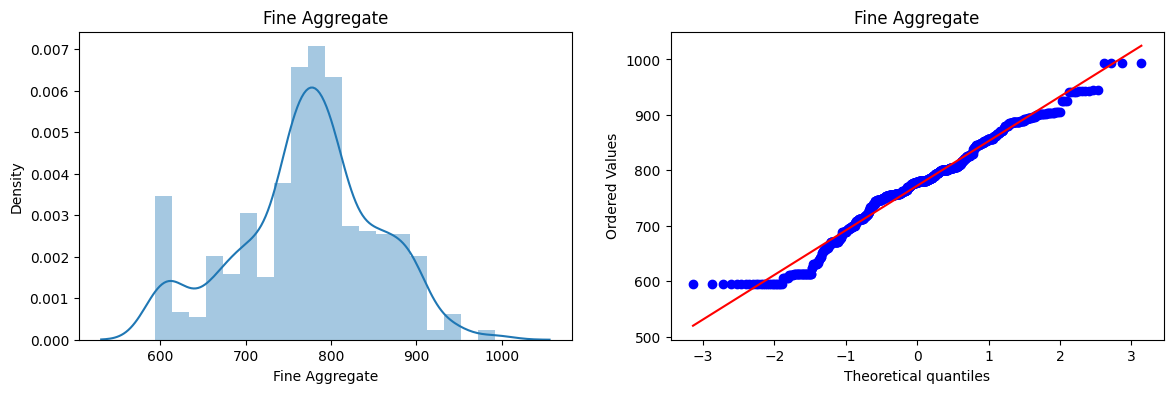

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


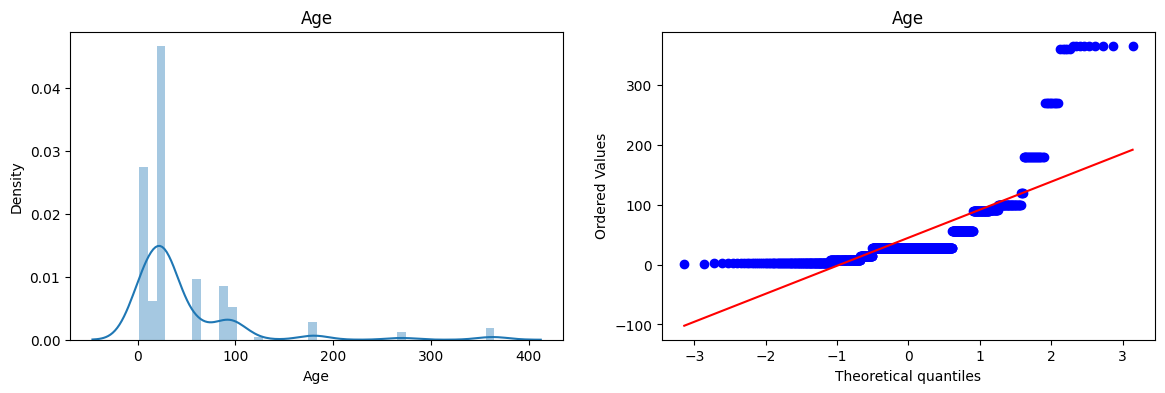

In [ ]:
# plotting the distplots without any transformation
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col], dist="norm",plot=plt)
  plt.title(col)

  plt.show()


In [ ]:
# Applying Box-Cox transform

pt= PowerTransformer(method='box-cox')
# we are adding 0.00001 because some of value is 0 which can not be implemented in box-cox
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)
# give the lambdas of all
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.027842
2             Fly Ash        -0.044554
3               Water         0.772682
4    Superplasticizer         0.113892
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782018
7                 Age         0.066630

In [ ]:
# applying linear regression on transformed data
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8054599368808216

In [ ]:
# Using CV score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.00001)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6668489643128354

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


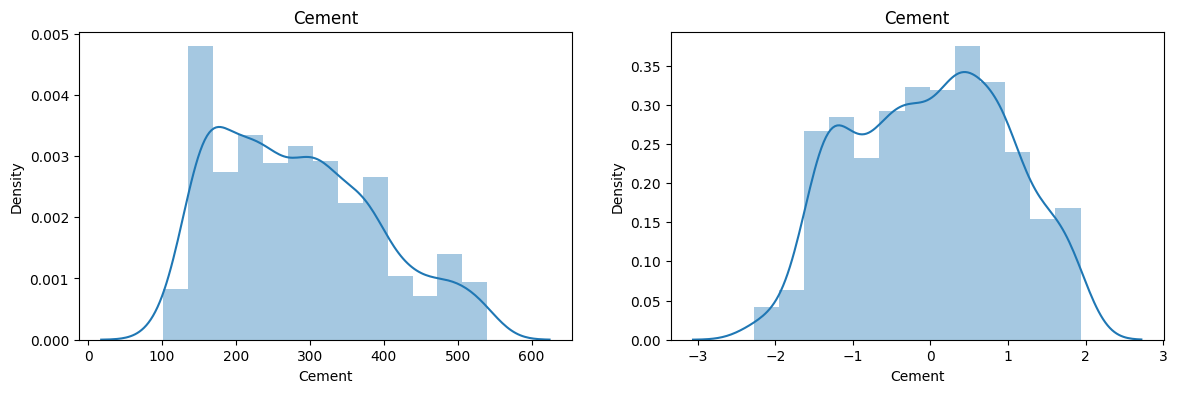

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


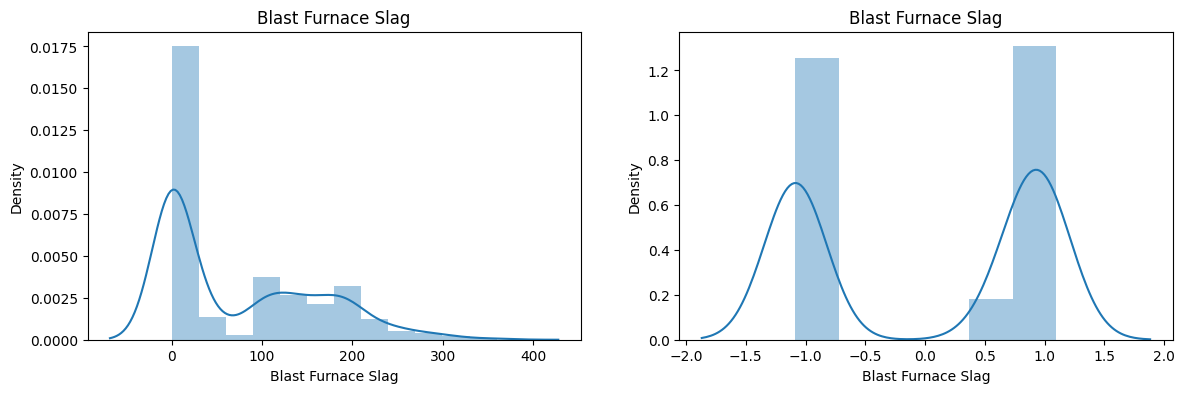

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


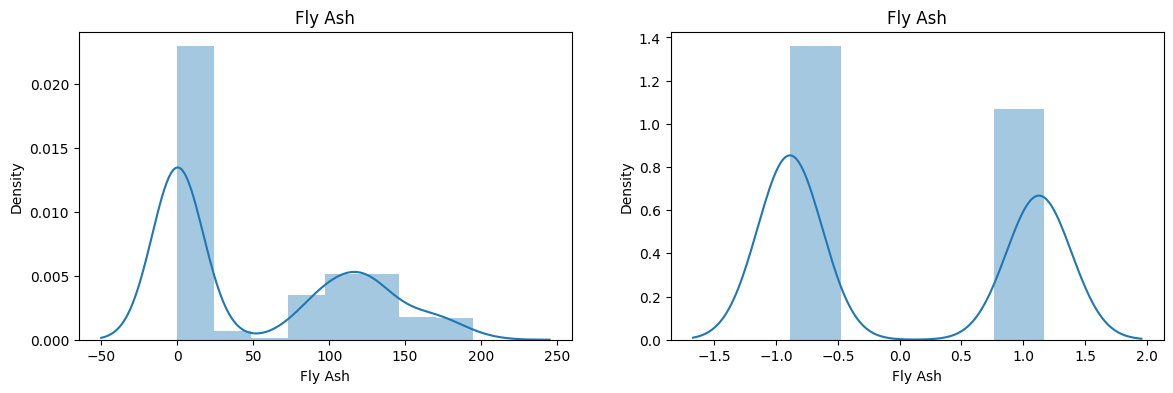

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


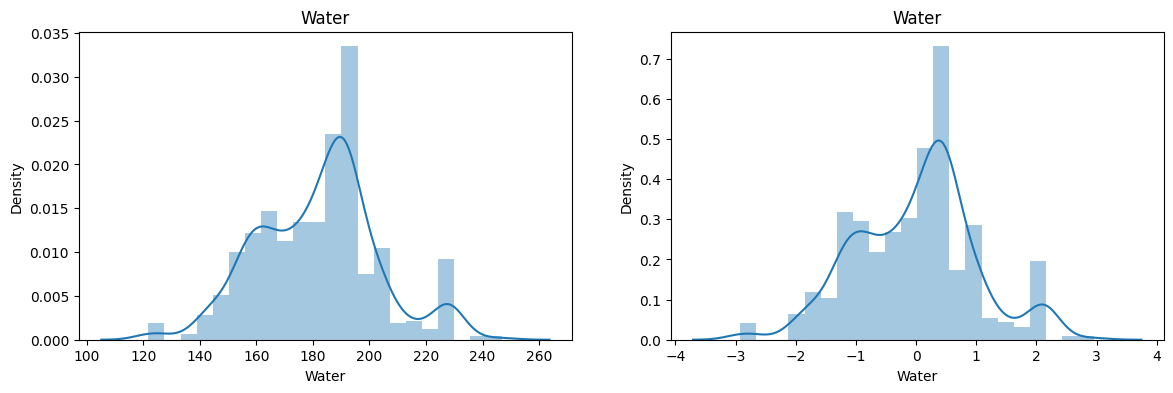

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


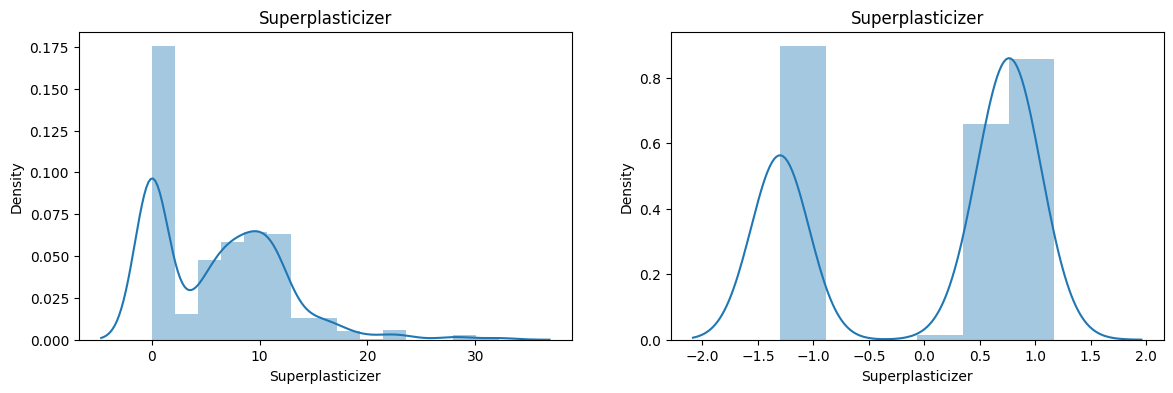

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


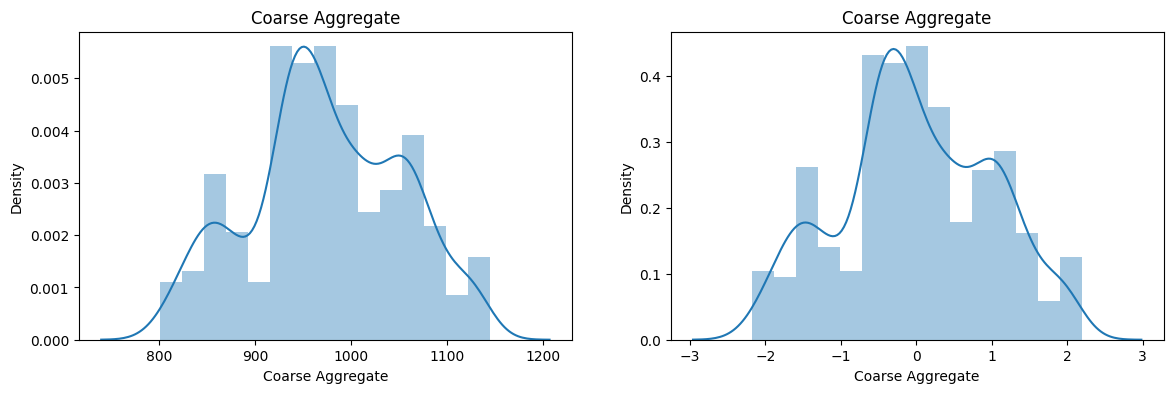

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


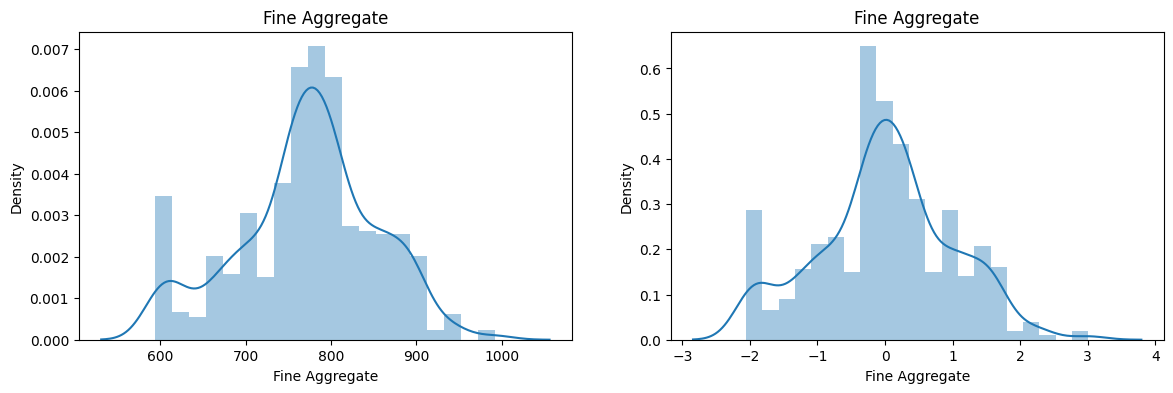

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


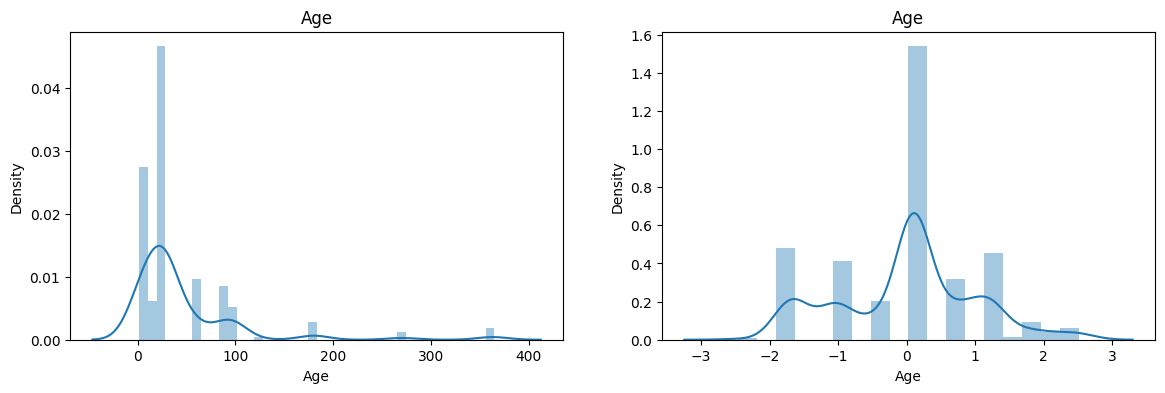

In [ ]:
# before and after comparision for Box-Cox plot
#changing numpy to df
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

  plt.show()

In [ ]:
# apply yeo-johnson transform
#by default also yeo-johnson
pt1 =PowerTransformer(method='yeo-johnson')
X_train_transformed = pt1.fit_transform(X_train)
X_test_transformed = pt1.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
print(r2_score(y_test,y_pred))
pd.DataFrame({'cols':X_train.columns, 'yeo_johnson_lambdas':pt1.lambdas_})

0.8161906512004999


cols  yeo_johnson_lambdas
0              Cement             0.174348
1  Blast Furnace Slag             0.015715
2             Fly Ash            -0.161447
3               Water             0.771307
4    Superplasticizer             0.253935
5    Coarse Aggregate             1.130050
6      Fine Aggregate             1.783100
7                 Age             0.019885

In [ ]:
# cv score
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6834625141500866

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


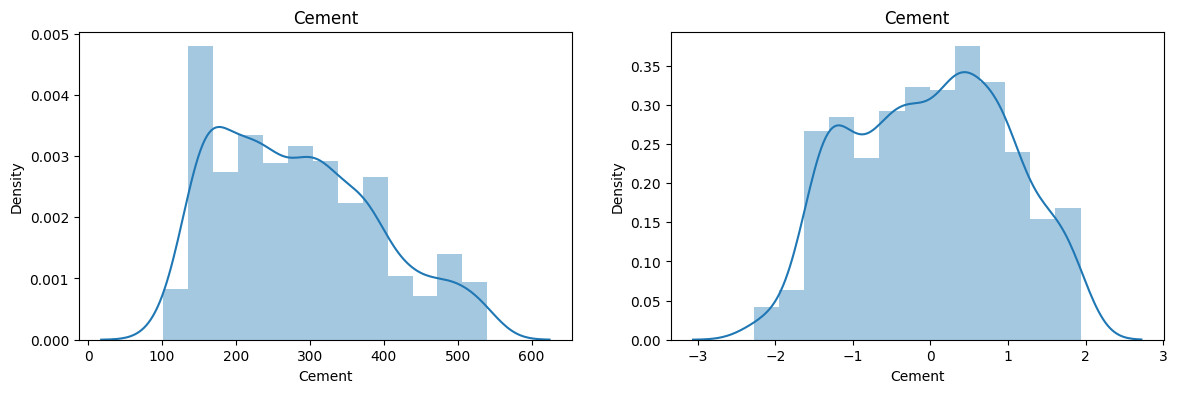

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


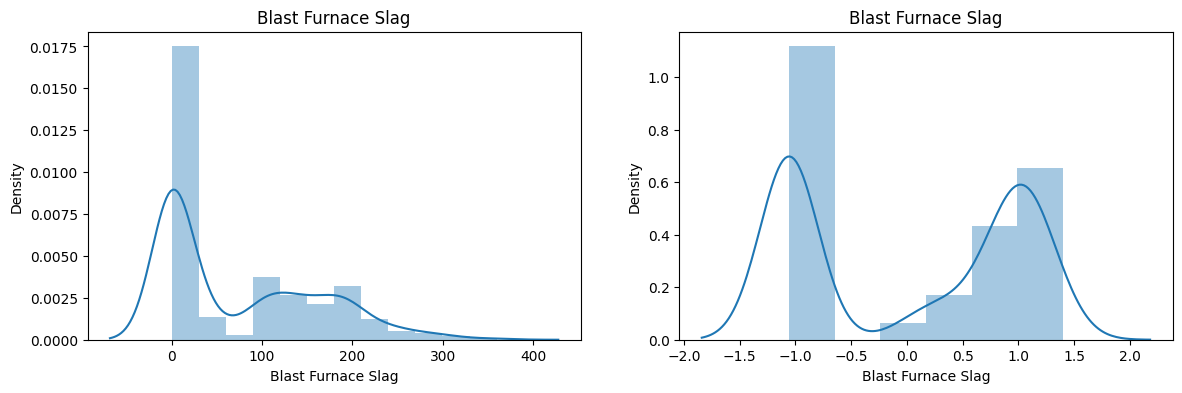

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


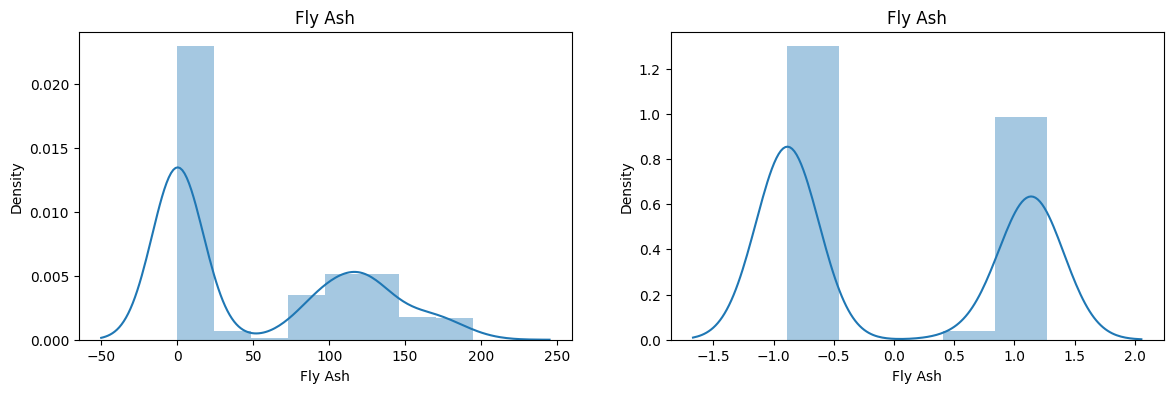

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


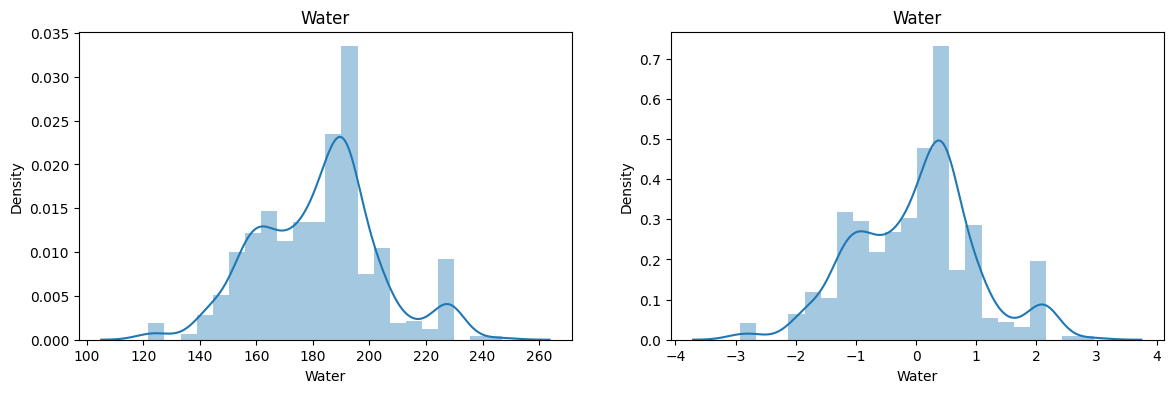

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


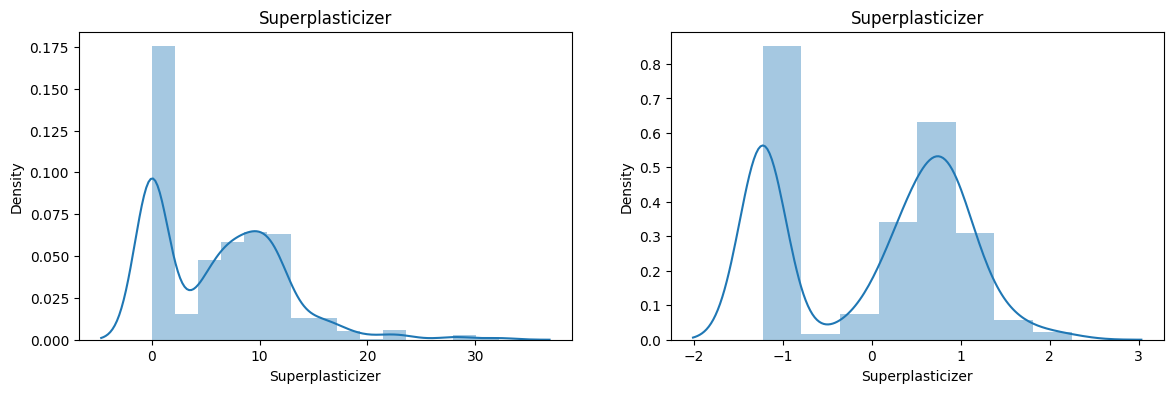

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


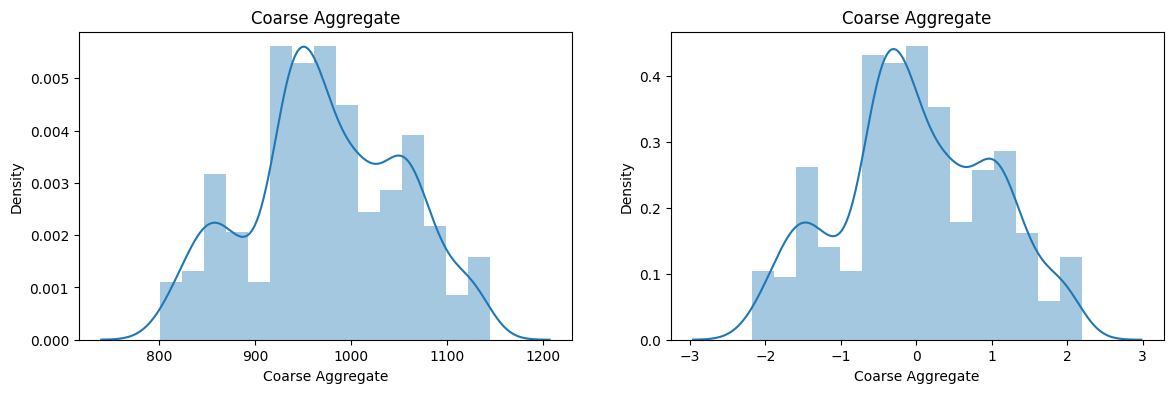

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


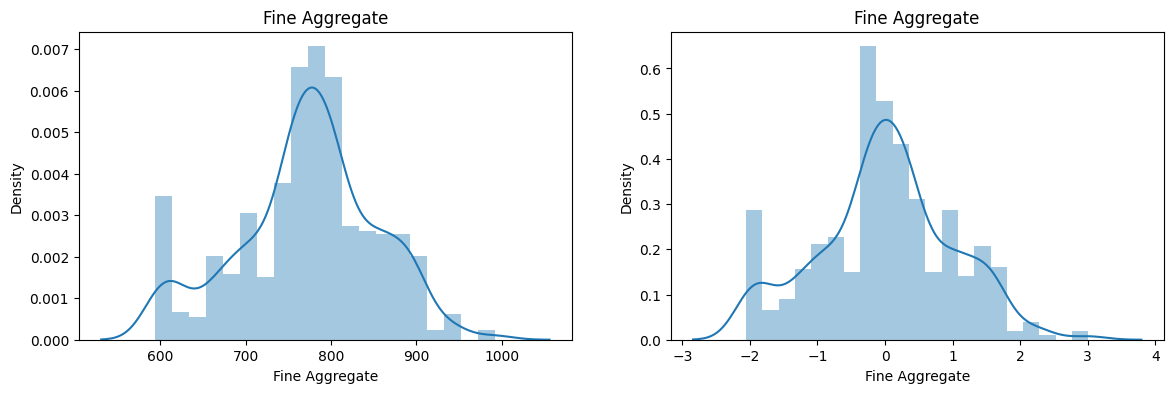

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


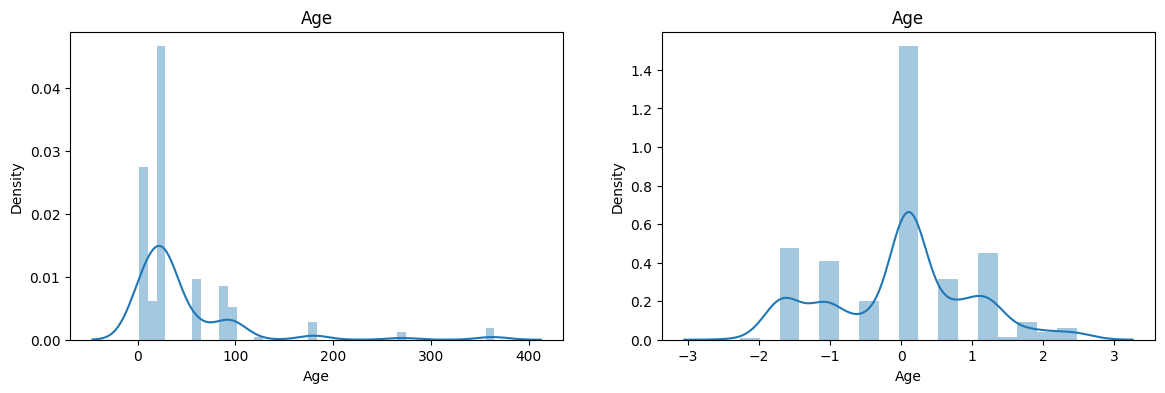

In [ ]:
#before and after yeo-johnson
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

  plt.show()

## Binning and binarization:

Convert numerical to categorical value.
sometime we need to convert numerical data to categorical data in case where there is variour range of data set in huge number. so, to improve the performance we need to convert into categorical

there two way to convert
1. Discretization(binning)
2. Binarization



**Binning**
the process of transforming continuous variables by creating a set of contiguous intervals that span the range of the variable's values. Discretzation is also binning, where bin is an alternative name for interval

converting into intervals

use:
- to handle outliers
- to improve the value spread(uniform)

outlier may come under some interval. so inside the internval all have same value.

type of binning:

1. Unsupervised binning
2. supervised binning

custom binning



### Unsupervised binning
 - equal width (uniform)
 - equal frequency (quantile)
 - kmeans binning

**equal width/uniform binning**
 first we need to decide the bins(no of interval), then
 ```interval width = (max value-min value)/ bins```
 so, this can be use for handling outliers and the it doesnot effect spread

**equal frequency (quantile)**
first we need to decide the bins,
then it will divide according to quantiles

for eg if bins= 10 then each interval contains 10% of total observation. if 0-16 be the 10% of data then this is interval 1 , 16- 24 = 10% of data then this is second interval and so on

this is better than equal width because
it is perform good with outliers and value spread is uniform


**kmeans binning**

It is a clustering alogrithm. In this alog interval is called centeriod. calculate the distance of each point to the centeriod. and make a cluster with closer centeriod. then we take mean with the cluster and now means will become new centeriod and again we calculate distance of each point with centriods and make cluster with the closest centeriod . this happen untill step before and now doesnot change at all



```
KBinsDiscretizer(n_bins, strategy, encoding(odinal or OHE))
```

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv')[['Age','Fare','Survived']]
df.head()

Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [ ]:
df.dropna(inplace=True) # drop missing value

In [ ]:
df.shape

(714, 3)

In [ ]:
X = df.iloc[:, :2]
y = df.iloc[:, 2:]

In [ ]:
X.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

Age     Fare
328  31.0  20.5250
73   26.0  14.4542
253  30.0  16.1000
719  33.0   7.7750
666  25.0  13.0000

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275039123630674

**After using transform**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([10])

In [ ]:
#range that bins create
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [ ]:
# create df
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output['age_labels'] = pd.cut(output['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(output['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.head()

age  age_trf     fare  fare_trf    age_labels    fare_labels
328  31.0      5.0  20.5250       5.0  (28.5, 32.0]  (15.75, 26.0]
73   26.0      4.0  14.4542       4.0  (25.0, 28.5]  (13.0, 15.75]
253  30.0      5.0  16.1000       5.0  (28.5, 32.0]  (15.75, 26.0]
719  33.0      6.0   7.7750       1.0  (32.0, 36.0]  (7.75, 7.896]
666  25.0      4.0  13.0000       4.0  (22.0, 25.0]  (9.225, 13.0]

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

In [ ]:
# using fun
import matplotlib.pyplot as plt

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6289514866979655


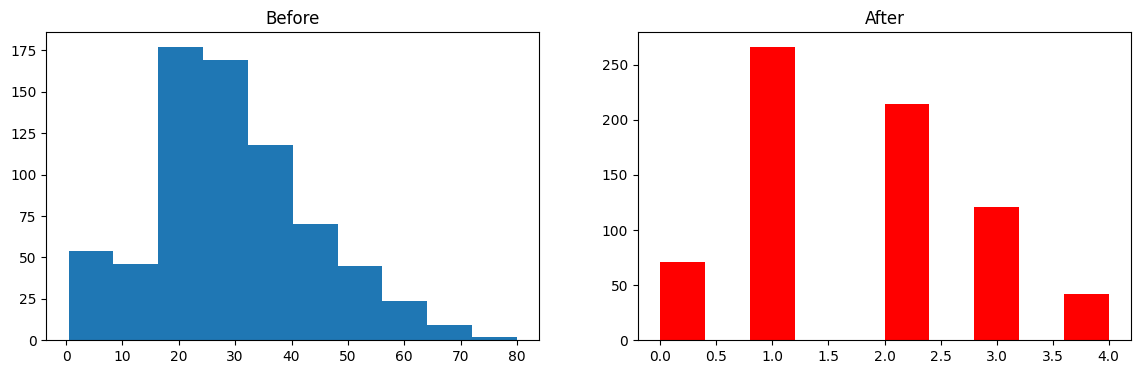

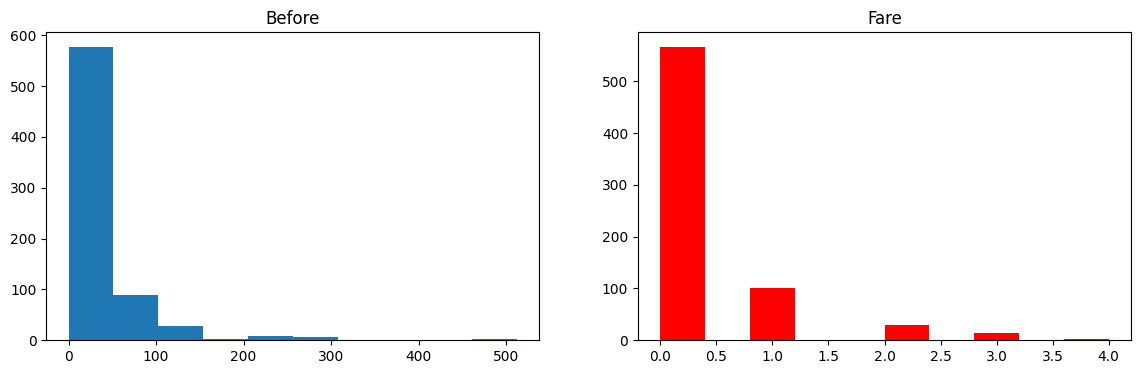

In [ ]:
#calling function
discretize(5,'kmeans')

### supervise binning
  - decision treee binning

### Binarization:
continous value is change to binary(0,1)

 if you are voter then:

 age>18 = 0 or 1


threshold = threshold value,

copy= create new col or change in same col

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]
df.dropna(inplace=True)
df.head()

Age     Fare  SibSp  Parch  Survived
0  22.0   7.2500      1      0         0
1  38.0  71.2833      1      0         1
2  26.0   7.9250      0      0         1
3  35.0  53.1000      1      0         1
4  35.0   8.0500      0      0         0

In [ ]:
#add sibsp and parch
df['family']=df['SibSp']+df['Parch']
df.head()

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1
2  26.0   7.9250      0      0         1       0
3  35.0  53.1000      1      0         1       1
4  35.0   8.0500      0      0         0       0

In [ ]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

Age     Fare  Survived  family
0  22.0   7.2500         0       1
1  38.0  71.2833         1       1
2  26.0   7.9250         1       0
3  35.0  53.1000         1       1
4  35.0   8.0500         0       0

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

Age     Fare  family
328  31.0  20.5250       2
73   26.0  14.4542       1
253  30.0  16.1000       1
719  33.0   7.7750       0
666  25.0  13.0000       0

In [ ]:
# binarizer have family or not
from sklearn.preprocessing import Binarizer
trf = ColumnTransformer([
    ('bin', Binarizer(threshold=0, copy=False),['family'])
],remainder='passthrough')

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
# since it has convert to numpy so we need to conver back to pd
X_transform_bina =pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])
X_transform_bina.head()

family   Age     Fare
0     1.0  31.0  20.5250
1     1.0  26.0  14.4542
2     1.0  30.0  16.1000
3     0.0  33.0   7.7750
4     0.0  25.0  13.0000

#Feature Construction
creating feature manually which are not their. so, it work better

create by add sub etc  of two or more col or studying col and create new col

# Feature Selection
only selective feature or col is given to model. So, it do better



#Feature Extraction
from given feature, creating different new features doing programmatically using algo. So it do better

For EG: if we have rooms and washroom as input and we need to predict the price. but, we can only choose one feature. For this we can add area of room and washroom since both are providing the area. By this now we can use new different col 'area' as one feature to predict the price

PCA = change into high dimension and make completely new feature

LDA

tsna

# Pipeline
Pipleline chains together multiple steps so that the output of each step is used as input to the next step

-make it easy to apply the same preprocessing to train and test

### without pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # missing data
from sklearn.preprocessing import OneHotEncoder # cate data
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.tree import DecisionTreeClassifier # prediction

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# drop some item
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)


In [ ]:
# first we need to take care of null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
X_train[['Embarked']].value_counts()

Embarked
S           525
C           125
Q            60
Name: count, dtype: int64

In [ ]:
si_age = SimpleImputer() # simpleImputer default is mean, we fill by taking mean
si_embarked = SimpleImputer(strategy='most_frequent') # here we use fill with most frequemt data on that col

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])


#since it is alreasy train so we need to use transform only
X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [ ]:
X_train_embarked[3:7]


array([[1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [ ]:
# one hot encoding sex and embarked
# handle_unknown = ignore mean if in test we got new cate value then we just ignore it
ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
#put data from the solving missing value
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)


In [ ]:
# we have alreday 3 col (age, sex, embarked)
# so we only remaining
X_train_rem = X_train.drop(columns=['Age','Embarked','Sex'])
X_test_rem = X_test.drop(columns=['Age','Embarked','Sex'])

In [ ]:
# add all col
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [ ]:
# export the model
import pickle
#if user select the category it need to convert
#to numerical form by OHE so model can understand
# this model ohe_sex will automatically convert to OHE
# so clf.pkl model can understand and predict
pickle.dump(ohe_sex,open('/content/ohe_sex.pkl','wb'))
#same
pickle.dump(ohe_embarked,open('/content/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
# now use the predict model
import pickle
# load the exported model to this variable
ohe_sex = pickle.load(open('ohe_sex.pkl','rb'))
ohe_embarked= pickle.load(open('ohe_embarked.pkl', 'rb'))
clf = pickle.load(open('clf.pkl','rb'))

In [ ]:
# for eg:user input
# pclass/gender/age/sibsp/parch/fare/embarked
test_input= np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype= object).reshape(1,7)

In [ ]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [ ]:
test_input_age= test_input[:,2].reshape(1,1)
test_input_age

In [ ]:
# coverting to OHE
# it select 2nd index value of array 'male'
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))
test_input_sex


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [ ]:
test_input_embarked = ohe_embarked.transform([test_input[: ,-1]]).reshape(1,1)

In [ ]:
# add the value
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

In [ ]:
clf.predict(test_input_transformed)

### with pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # missing data
from sklearn.preprocessing import OneHotEncoder # cate data
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.tree import DecisionTreeClassifier # prediction
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Now the plan is:
1. missing value solve
2. OHE
3. scaling
4. feature selection
5. train model

in serier one output becomes input of other

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S

In [ ]:
y_train.sample(5)

173    0
71     0
142    1
463    0
169    0
Name: Survived, dtype: int64

In [ ]:
#imputaion transformer
trf1 = ColumnTransformer([
    # no name of col beacause it will become array after each compution
    # it work good at numpy and df
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough') # other col works as it is
#encoding
#sex comes at 1 index and embarked comes at 6 index
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

#scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

#feature selection
trf4 = SelectKBest(score_func=chi2,k=8)
#train the model
trf5 = DecisionTreeClassifier()

In [ ]:
# create by Pipeline
pipe =Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

#alternative by make_pipeline
# this doesnot requried naming of stage
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a3055e86c20>)),
                ('trf5', DecisionTreeClassifier())])

In [ ]:
# explore pipe
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7a3055e86c20>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
y_pred = pipe.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [ ]:
#  CV using pipeline
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

0.6391214419383433

In [ ]:
# hyperparameter tuning
#gridsearahCV
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7a3055e86c20>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a3055e86c20>)),
                ('trf5', DecisionTreeClassifier(max_depth=2))])

In [ ]:
grid.best_score_

0.6391214419383433

In [ ]:
grid.best_params_

{'trf5__max_depth': 2}

In [ ]:
#Export the pipeline
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

Using exported pipe

In [ ]:
pipe= pickle.load(open('/content/pipe.pkl','rb'))

In [ ]:
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype= object).reshape(1,7)

In [ ]:
pipe.predict(test_input2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])